# Linear Regression

$\textbf{1)}$Formula:$$y=a\textbf{x} + b$$
Cost function:$$J(a,b) = \frac{1}{2N}\sum_{i=0}^{N}(y_i-ax_i-b)^2$$

$\textbf{2)}$ Termination criterion is number of iteration, here I set 50000. 

In [1]:
import numpy as np
import matplotlib.pylab as pl
import random

def gradient(X, y, a, b):
    #y = aX + b
    #loss = 1/2N * sum((y - aX - b)^2)
    da, db = 0.0, 0.0
    N = len(X)
    db = np.sum(-1.0/N * (y - a*X - b))
    da = np.sum(-1.0/N * (y - a*X - b) * X)
    return da, db

def loss(X, y, a, b):
    N = len(X)
    loss = 0.5/N * np.sum((y - a*X - b)**2)
    return loss

def Huber(X, y, a, b, sigma):
    N = len(X)
    #residuals
    res = y - a*X - b
    res_abs = np.abs(res)
    idx_l = [res_abs<=sigma]
    idx_g = [res_abs>sigma]
    loss = 0.5*np.sum(res[idx_l]**2) + sigma * np.sum(res_abs[idx_g] - 0.5*sigma)
    loss /= N
    db = 1.0/N * (-np.sum(res[idx_l]) + sigma * (-np.sum(np.sign(res[idx_g]))))
    da = -np.sum(X[idx_l]*res[idx_l]) + sigma *(-np.sum(X[idx_g]))
    da /= N
    return loss, da, db

def opt(X, y, a, b, learning_rate, num_iter, browse = True):
#     a_update, b_update = 0.0, 0.0
    for i in range(num_iter):
        da, db = gradient(X, y, a, b)
        #update a, b
        a -= learning_rate * da
        b -= learning_rate * db
        if browse:
            print 'iter {0}:loss={1}'.format(i,loss(X, y, a, b))
    return a, b
def test(TEST_PATH, a, b):
    X_test, y_test = load_data(TEST_PATH)
    return loss(X_test, y_test, a, b)
def load_data(PATH):
    data =np.loadtxt(PATH, skiprows=1)
    X, y = data[:,0], data[:,1]
    X /=10.0
    y /=100.0
    return X, y

def linear_regression(PATH):
    #hyperparameter
    learning_rate = 0.001
    a_init = random.random()
    b_init = random.random()
    num_iter = 50000
    print a_init, b_init
    #load data
    X, y = load_data(PATH)
    
    #train
    print 'Train start...'
    a, b = opt(X, y, a_init, b_init, learning_rate, num_iter)
    print 'Result:\n a = {0}\n b = {1}\n loss = {2}\n'.format(a, b, loss(X, y, a, b))
    
    #plot
    y_p = a*X + b
    pl.plot(X, y, 'o')
    pl.plot(X, y_p, 'k-')
    pl.show()
    return a, b

0.44711935903 0.90876433752
Train start...
iter 0:loss=1.82467033909
iter 1:loss=1.81769175944
iter 2:loss=1.81115299311
iter 3:loss=1.80502462952
iter 4:loss=1.79927922526
iter 5:loss=1.79389117259
iter 6:loss=1.78883657657
iter 7:loss=1.78409314055
iter 8:loss=1.77964005926
iter 9:loss=1.77545791901
iter 10:loss=1.77152860467
iter 11:loss=1.76783521278
iter 12:loss=1.7643619705
iter 13:loss=1.76109416002
iter 14:loss=1.75801804793
iter 15:loss=1.75512081945
iter 16:loss=1.75239051692
iter 17:loss=1.74981598252
iter 18:loss=1.74738680472
iter 19:loss=1.74509326843
iter 20:loss=1.74292630834
iter 21:loss=1.74087746551
iter 22:loss=1.7389388468
iter 23:loss=1.73710308701
iter 24:loss=1.73536331359
iter 25:loss=1.73371311368
iter 26:loss=1.73214650334
iter 27:loss=1.73065789888
iter 28:loss=1.72924209012
iter 29:loss=1.72789421535
iter 30:loss=1.72660973803
iter 31:loss=1.72538442509
iter 32:loss=1.72421432658
iter 33:loss=1.72309575675
iter 34:loss=1.72202527638
iter 35:loss=1.720999676

iter 576:loss=1.51083613364
iter 577:loss=1.51049104629
iter 578:loss=1.51014605462
iter 579:loss=1.50980115859
iter 580:loss=1.50945635819
iter 581:loss=1.50911165339
iter 582:loss=1.50876704416
iter 583:loss=1.50842253047
iter 584:loss=1.5080781123
iter 585:loss=1.50773378962
iter 586:loss=1.50738956241
iter 587:loss=1.50704543063
iter 588:loss=1.50670139426
iter 589:loss=1.50635745329
iter 590:loss=1.50601360767
iter 591:loss=1.50566985738
iter 592:loss=1.5053262024
iter 593:loss=1.50498264269
iter 594:loss=1.50463917824
iter 595:loss=1.50429580902
iter 596:loss=1.503952535
iter 597:loss=1.50360935615
iter 598:loss=1.50326627245
iter 599:loss=1.50292328387
iter 600:loss=1.50258039039
iter 601:loss=1.50223759197
iter 602:loss=1.5018948886
iter 603:loss=1.50155228024
iter 604:loss=1.50120976687
iter 605:loss=1.50086734847
iter 606:loss=1.500525025
iter 607:loss=1.50018279644
iter 608:loss=1.49984066276
iter 609:loss=1.49949862395
iter 610:loss=1.49915667996
iter 611:loss=1.49881483078

iter 2604:loss=0.975468268774
iter 2605:loss=0.975271614089
iter 2606:loss=0.975075013927
iter 2607:loss=0.974878468273
iter 2608:loss=0.974681977113
iter 2609:loss=0.97448554043
iter 2610:loss=0.974289158209
iter 2611:loss=0.974092830437
iter 2612:loss=0.973896557097
iter 2613:loss=0.973700338175
iter 2614:loss=0.973504173655
iter 2615:loss=0.973308063522
iter 2616:loss=0.973112007761
iter 2617:loss=0.972916006358
iter 2618:loss=0.972720059297
iter 2619:loss=0.972524166563
iter 2620:loss=0.97232832814
iter 2621:loss=0.972132544015
iter 2622:loss=0.971936814172
iter 2623:loss=0.971741138595
iter 2624:loss=0.97154551727
iter 2625:loss=0.971349950182
iter 2626:loss=0.971154437315
iter 2627:loss=0.970958978655
iter 2628:loss=0.970763574187
iter 2629:loss=0.970568223896
iter 2630:loss=0.970372927765
iter 2631:loss=0.970177685782
iter 2632:loss=0.96998249793
iter 2633:loss=0.969787364194
iter 2634:loss=0.969592284561
iter 2635:loss=0.969397259013
iter 2636:loss=0.969202287537
iter 2637:loss

iter 4608:loss=0.673077524013
iter 4609:loss=0.672964708249
iter 4610:loss=0.672851923764
iter 4611:loss=0.672739170548
iter 4612:loss=0.672626448594
iter 4613:loss=0.672513757892
iter 4614:loss=0.672401098434
iter 4615:loss=0.672288470212
iter 4616:loss=0.672175873216
iter 4617:loss=0.672063307438
iter 4618:loss=0.671950772869
iter 4619:loss=0.671838269501
iter 4620:loss=0.671725797325
iter 4621:loss=0.671613356332
iter 4622:loss=0.671500946514
iter 4623:loss=0.671388567861
iter 4624:loss=0.671276220367
iter 4625:loss=0.67116390402
iter 4626:loss=0.671051618814
iter 4627:loss=0.67093936474
iter 4628:loss=0.670827141788
iter 4629:loss=0.670714949951
iter 4630:loss=0.670602789219
iter 4631:loss=0.670490659584
iter 4632:loss=0.670378561038
iter 4633:loss=0.670266493571
iter 4634:loss=0.670154457175
iter 4635:loss=0.670042451842
iter 4636:loss=0.669930477563
iter 4637:loss=0.669818534329
iter 4638:loss=0.669706622131
iter 4639:loss=0.669594740962
iter 4640:loss=0.669482890812
iter 4641:lo

iter 6599:loss=0.500446675425
iter 6600:loss=0.500381722184
iter 6601:loss=0.500316786952
iter 6602:loss=0.500251869724
iter 6603:loss=0.500186970494
iter 6604:loss=0.500122089258
iter 6605:loss=0.50005722601
iter 6606:loss=0.499992380745
iter 6607:loss=0.49992755346
iter 6608:loss=0.499862744148
iter 6609:loss=0.499797952804
iter 6610:loss=0.499733179424
iter 6611:loss=0.499668424003
iter 6612:loss=0.499603686535
iter 6613:loss=0.499538967017
iter 6614:loss=0.499474265441
iter 6615:loss=0.499409581805
iter 6616:loss=0.499344916102
iter 6617:loss=0.499280268329
iter 6618:loss=0.499215638479
iter 6619:loss=0.499151026547
iter 6620:loss=0.49908643253
iter 6621:loss=0.499021856422
iter 6622:loss=0.498957298218
iter 6623:loss=0.498892757912
iter 6624:loss=0.498828235501
iter 6625:loss=0.498763730979
iter 6626:loss=0.49869924434
iter 6627:loss=0.498634775581
iter 6628:loss=0.498570324697
iter 6629:loss=0.498505891681
iter 6630:loss=0.49844147653
iter 6631:loss=0.498377079238
iter 6632:loss=

iter 8604:loss=0.400532521235
iter 8605:loss=0.400495269553
iter 8606:loss=0.400458028199
iter 8607:loss=0.400420797171
iter 8608:loss=0.400383576464
iter 8609:loss=0.400346366078
iter 8610:loss=0.400309166008
iter 8611:loss=0.400271976252
iter 8612:loss=0.400234796807
iter 8613:loss=0.40019762767
iter 8614:loss=0.400160468838
iter 8615:loss=0.400123320309
iter 8616:loss=0.400086182079
iter 8617:loss=0.400049054146
iter 8618:loss=0.400011936507
iter 8619:loss=0.399974829159
iter 8620:loss=0.399937732099
iter 8621:loss=0.399900645325
iter 8622:loss=0.399863568832
iter 8623:loss=0.39982650262
iter 8624:loss=0.399789446684
iter 8625:loss=0.399752401022
iter 8626:loss=0.399715365631
iter 8627:loss=0.399678340508
iter 8628:loss=0.399641325651
iter 8629:loss=0.399604321056
iter 8630:loss=0.399567326721
iter 8631:loss=0.399530342642
iter 8632:loss=0.399493368818
iter 8633:loss=0.399456405244
iter 8634:loss=0.399419451919
iter 8635:loss=0.39938250884
iter 8636:loss=0.399345576003
iter 8637:los

iter 10623:loss=0.34293165433
iter 10624:loss=0.342910372696
iter 10625:loss=0.342889096961
iter 10626:loss=0.342867827126
iter 10627:loss=0.342846563188
iter 10628:loss=0.342825305145
iter 10629:loss=0.342804052996
iter 10630:loss=0.342782806739
iter 10631:loss=0.342761566373
iter 10632:loss=0.342740331896
iter 10633:loss=0.342719103306
iter 10634:loss=0.342697880602
iter 10635:loss=0.342676663782
iter 10636:loss=0.342655452844
iter 10637:loss=0.342634247788
iter 10638:loss=0.34261304861
iter 10639:loss=0.34259185531
iter 10640:loss=0.342570667886
iter 10641:loss=0.342549486336
iter 10642:loss=0.342528310659
iter 10643:loss=0.342507140853
iter 10644:loss=0.342485976916
iter 10645:loss=0.342464818847
iter 10646:loss=0.342443666644
iter 10647:loss=0.342422520306
iter 10648:loss=0.34240137983
iter 10649:loss=0.342380245216
iter 10650:loss=0.342359116462
iter 10651:loss=0.342337993565
iter 10652:loss=0.342316876525
iter 10653:loss=0.34229576534
iter 10654:loss=0.342274660008
iter 10655:lo

iter 12587:loss=0.310698579268
iter 12588:loss=0.310686234369
iter 12589:loss=0.310673892893
iter 12590:loss=0.310661554839
iter 12591:loss=0.310649220205
iter 12592:loss=0.310636888992
iter 12593:loss=0.310624561197
iter 12594:loss=0.31061223682
iter 12595:loss=0.31059991586
iter 12596:loss=0.310587598316
iter 12597:loss=0.310575284187
iter 12598:loss=0.310562973473
iter 12599:loss=0.310550666171
iter 12600:loss=0.310538362282
iter 12601:loss=0.310526061804
iter 12602:loss=0.310513764736
iter 12603:loss=0.310501471078
iter 12604:loss=0.310489180828
iter 12605:loss=0.310476893986
iter 12606:loss=0.31046461055
iter 12607:loss=0.31045233052
iter 12608:loss=0.310440053895
iter 12609:loss=0.310427780673
iter 12610:loss=0.310415510855
iter 12611:loss=0.310403244438
iter 12612:loss=0.310390981422
iter 12613:loss=0.310378721806
iter 12614:loss=0.310366465588
iter 12615:loss=0.31035421277
iter 12616:loss=0.310341963348
iter 12617:loss=0.310329717322
iter 12618:loss=0.310317474692
iter 12619:lo

iter 14610:loss=0.291581930886
iter 14611:loss=0.291574886147
iter 14612:loss=0.291567843361
iter 14613:loss=0.291560802528
iter 14614:loss=0.291553763646
iter 14615:loss=0.291546726717
iter 14616:loss=0.291539691738
iter 14617:loss=0.29153265871
iter 14618:loss=0.291525627631
iter 14619:loss=0.291518598502
iter 14620:loss=0.291511571322
iter 14621:loss=0.291504546091
iter 14622:loss=0.291497522807
iter 14623:loss=0.29149050147
iter 14624:loss=0.29148348208
iter 14625:loss=0.291476464636
iter 14626:loss=0.291469449137
iter 14627:loss=0.291462435584
iter 14628:loss=0.291455423976
iter 14629:loss=0.291448414311
iter 14630:loss=0.29144140659
iter 14631:loss=0.291434400811
iter 14632:loss=0.291427396975
iter 14633:loss=0.291420395081
iter 14634:loss=0.291413395128
iter 14635:loss=0.291406397116
iter 14636:loss=0.291399401045
iter 14637:loss=0.291392406912
iter 14638:loss=0.291385414719
iter 14639:loss=0.291378424465
iter 14640:loss=0.291371436149
iter 14641:loss=0.29136444977
iter 14642:lo

iter 16594:loss=0.28083048395
iter 16595:loss=0.280826420089
iter 16596:loss=0.280822357353
iter 16597:loss=0.280818295745
iter 16598:loss=0.280814235262
iter 16599:loss=0.280810175905
iter 16600:loss=0.280806117674
iter 16601:loss=0.280802060568
iter 16602:loss=0.280798004586
iter 16603:loss=0.280793949729
iter 16604:loss=0.280789895997
iter 16605:loss=0.280785843388
iter 16606:loss=0.280781791903
iter 16607:loss=0.280777741541
iter 16608:loss=0.280773692302
iter 16609:loss=0.280769644186
iter 16610:loss=0.280765597192
iter 16611:loss=0.28076155132
iter 16612:loss=0.28075750657
iter 16613:loss=0.280753462942
iter 16614:loss=0.280749420434
iter 16615:loss=0.280745379047
iter 16616:loss=0.280741338781
iter 16617:loss=0.280737299635
iter 16618:loss=0.280733261609
iter 16619:loss=0.280729224702
iter 16620:loss=0.280725188915
iter 16621:loss=0.280721154246
iter 16622:loss=0.280717120697
iter 16623:loss=0.280713088265
iter 16624:loss=0.280709056952
iter 16625:loss=0.280705026756
iter 16626:

iter 18579:loss=0.274626008653
iter 18580:loss=0.274623665005
iter 18581:loss=0.274621322006
iter 18582:loss=0.274618979656
iter 18583:loss=0.274616637956
iter 18584:loss=0.274614296905
iter 18585:loss=0.274611956504
iter 18586:loss=0.274609616751
iter 18587:loss=0.274607277647
iter 18588:loss=0.274604939191
iter 18589:loss=0.274602601384
iter 18590:loss=0.274600264225
iter 18591:loss=0.274597927714
iter 18592:loss=0.274595591851
iter 18593:loss=0.274593256635
iter 18594:loss=0.274590922067
iter 18595:loss=0.274588588146
iter 18596:loss=0.274586254872
iter 18597:loss=0.274583922245
iter 18598:loss=0.274581590265
iter 18599:loss=0.274579258931
iter 18600:loss=0.274576928244
iter 18601:loss=0.274574598203
iter 18602:loss=0.274572268808
iter 18603:loss=0.274569940059
iter 18604:loss=0.274567611955
iter 18605:loss=0.274565284497
iter 18606:loss=0.274562957684
iter 18607:loss=0.274560631517
iter 18608:loss=0.274558305994
iter 18609:loss=0.274555981116
iter 18610:loss=0.274553656882
iter 186

iter 20608:loss=0.270988740757
iter 20609:loss=0.270987405554
iter 20610:loss=0.270986070721
iter 20611:loss=0.270984736258
iter 20612:loss=0.270983402165
iter 20613:loss=0.270982068442
iter 20614:loss=0.270980735088
iter 20615:loss=0.270979402105
iter 20616:loss=0.270978069491
iter 20617:loss=0.270976737246
iter 20618:loss=0.270975405371
iter 20619:loss=0.270974073865
iter 20620:loss=0.270972742728
iter 20621:loss=0.270971411961
iter 20622:loss=0.270970081562
iter 20623:loss=0.270968751532
iter 20624:loss=0.270967421871
iter 20625:loss=0.270966092579
iter 20626:loss=0.270964763655
iter 20627:loss=0.270963435099
iter 20628:loss=0.270962106912
iter 20629:loss=0.270960779093
iter 20630:loss=0.270959451642
iter 20631:loss=0.27095812456
iter 20632:loss=0.270956797845
iter 20633:loss=0.270955471498
iter 20634:loss=0.270954145519
iter 20635:loss=0.270952819907
iter 20636:loss=0.270951494663
iter 20637:loss=0.270950169787
iter 20638:loss=0.270948845278
iter 20639:loss=0.270947521136
iter 2064

iter 22601:loss=0.268944073594
iter 22602:loss=0.268943305282
iter 22603:loss=0.268942537183
iter 22604:loss=0.268941769297
iter 22605:loss=0.268941001624
iter 22606:loss=0.268940234164
iter 22607:loss=0.268939466917
iter 22608:loss=0.268938699882
iter 22609:loss=0.26893793306
iter 22610:loss=0.268937166451
iter 22611:loss=0.268936400054
iter 22612:loss=0.26893563387
iter 22613:loss=0.268934867898
iter 22614:loss=0.268934102138
iter 22615:loss=0.268933336591
iter 22616:loss=0.268932571256
iter 22617:loss=0.268931806133
iter 22618:loss=0.268931041222
iter 22619:loss=0.268930276524
iter 22620:loss=0.268929512037
iter 22621:loss=0.268928747763
iter 22622:loss=0.2689279837
iter 22623:loss=0.268927219849
iter 22624:loss=0.26892645621
iter 22625:loss=0.268925692783
iter 22626:loss=0.268924929567
iter 22627:loss=0.268924166563
iter 22628:loss=0.26892340377
iter 22629:loss=0.268922641189
iter 22630:loss=0.268921878819
iter 22631:loss=0.268921116661
iter 22632:loss=0.268920354714
iter 22633:los

iter 24592:loss=0.267768401632
iter 24593:loss=0.26776795928
iter 24594:loss=0.26776751705
iter 24595:loss=0.267767074942
iter 24596:loss=0.267766632958
iter 24597:loss=0.267766191095
iter 24598:loss=0.267765749356
iter 24599:loss=0.267765307738
iter 24600:loss=0.267764866244
iter 24601:loss=0.267764424871
iter 24602:loss=0.267763983621
iter 24603:loss=0.267763542494
iter 24604:loss=0.267763101488
iter 24605:loss=0.267762660605
iter 24606:loss=0.267762219844
iter 24607:loss=0.267761779206
iter 24608:loss=0.267761338689
iter 24609:loss=0.267760898295
iter 24610:loss=0.267760458022
iter 24611:loss=0.267760017872
iter 24612:loss=0.267759577844
iter 24613:loss=0.267759137938
iter 24614:loss=0.267758698154
iter 24615:loss=0.267758258491
iter 24616:loss=0.267757818951
iter 24617:loss=0.267757379533
iter 24618:loss=0.267756940236
iter 24619:loss=0.267756501061
iter 24620:loss=0.267756062008
iter 24621:loss=0.267755623076
iter 24622:loss=0.267755184267
iter 24623:loss=0.267754745579
iter 24624

iter 26597:loss=0.267087953899
iter 26598:loss=0.267087700203
iter 26599:loss=0.267087446577
iter 26600:loss=0.267087193022
iter 26601:loss=0.267086939537
iter 26602:loss=0.267086686122
iter 26603:loss=0.267086432777
iter 26604:loss=0.267086179503
iter 26605:loss=0.267085926299
iter 26606:loss=0.267085673165
iter 26607:loss=0.267085420101
iter 26608:loss=0.267085167108
iter 26609:loss=0.267084914185
iter 26610:loss=0.267084661331
iter 26611:loss=0.267084408548
iter 26612:loss=0.267084155835
iter 26613:loss=0.267083903192
iter 26614:loss=0.267083650619
iter 26615:loss=0.267083398116
iter 26616:loss=0.267083145683
iter 26617:loss=0.267082893321
iter 26618:loss=0.267082641028
iter 26619:loss=0.267082388805
iter 26620:loss=0.267082136651
iter 26621:loss=0.267081884568
iter 26622:loss=0.267081632555
iter 26623:loss=0.267081380612
iter 26624:loss=0.267081128738
iter 26625:loss=0.267080876934
iter 26626:loss=0.2670806252
iter 26627:loss=0.267080373536
iter 26628:loss=0.267080121942
iter 26629

iter 28603:loss=0.266697561163
iter 28604:loss=0.266697415705
iter 28605:loss=0.266697270287
iter 28606:loss=0.26669712491
iter 28607:loss=0.266696979572
iter 28608:loss=0.266696834275
iter 28609:loss=0.266696689019
iter 28610:loss=0.266696543802
iter 28611:loss=0.266696398626
iter 28612:loss=0.26669625349
iter 28613:loss=0.266696108395
iter 28614:loss=0.266695963339
iter 28615:loss=0.266695818324
iter 28616:loss=0.266695673349
iter 28617:loss=0.266695528414
iter 28618:loss=0.26669538352
iter 28619:loss=0.266695238665
iter 28620:loss=0.266695093851
iter 28621:loss=0.266694949077
iter 28622:loss=0.266694804343
iter 28623:loss=0.266694659649
iter 28624:loss=0.266694514995
iter 28625:loss=0.266694370381
iter 28626:loss=0.266694225808
iter 28627:loss=0.266694081274
iter 28628:loss=0.266693936781
iter 28629:loss=0.266693792327
iter 28630:loss=0.266693647914
iter 28631:loss=0.266693503541
iter 28632:loss=0.266693359208
iter 28633:loss=0.266693214914
iter 28634:loss=0.266693070661
iter 28635:

iter 30582:loss=0.266475987551
iter 30583:loss=0.266475903525
iter 30584:loss=0.266475819522
iter 30585:loss=0.266475735543
iter 30586:loss=0.266475651586
iter 30587:loss=0.266475567653
iter 30588:loss=0.266475483744
iter 30589:loss=0.266475399857
iter 30590:loss=0.266475315994
iter 30591:loss=0.266475232154
iter 30592:loss=0.266475148337
iter 30593:loss=0.266475064544
iter 30594:loss=0.266474980774
iter 30595:loss=0.266474897027
iter 30596:loss=0.266474813303
iter 30597:loss=0.266474729602
iter 30598:loss=0.266474645925
iter 30599:loss=0.266474562271
iter 30600:loss=0.26647447864
iter 30601:loss=0.266474395032
iter 30602:loss=0.266474311447
iter 30603:loss=0.266474227886
iter 30604:loss=0.266474144348
iter 30605:loss=0.266474060833
iter 30606:loss=0.266473977341
iter 30607:loss=0.266473893872
iter 30608:loss=0.266473810426
iter 30609:loss=0.266473727004
iter 30610:loss=0.266473643604
iter 30611:loss=0.266473560228
iter 30612:loss=0.266473476875
iter 30613:loss=0.266473393545
iter 3061

iter 32595:loss=0.266346349405
iter 32596:loss=0.266346301321
iter 32597:loss=0.266346253251
iter 32598:loss=0.266346205194
iter 32599:loss=0.266346157151
iter 32600:loss=0.26634610912
iter 32601:loss=0.266346061104
iter 32602:loss=0.2663460131
iter 32603:loss=0.26634596511
iter 32604:loss=0.266345917133
iter 32605:loss=0.266345869169
iter 32606:loss=0.266345821219
iter 32607:loss=0.266345773282
iter 32608:loss=0.266345725358
iter 32609:loss=0.266345677447
iter 32610:loss=0.26634562955
iter 32611:loss=0.266345581666
iter 32612:loss=0.266345533796
iter 32613:loss=0.266345485938
iter 32614:loss=0.266345438094
iter 32615:loss=0.266345390263
iter 32616:loss=0.266345342446
iter 32617:loss=0.266345294641
iter 32618:loss=0.26634524685
iter 32619:loss=0.266345199073
iter 32620:loss=0.266345151308
iter 32621:loss=0.266345103557
iter 32622:loss=0.266345055819
iter 32623:loss=0.266345008094
iter 32624:loss=0.266344960382
iter 32625:loss=0.266344912684
iter 32626:loss=0.266344864999
iter 32627:los

iter 34600:loss=0.266272385083
iter 34601:loss=0.266272357506
iter 34602:loss=0.266272329937
iter 34603:loss=0.266272302376
iter 34604:loss=0.266272274822
iter 34605:loss=0.266272247276
iter 34606:loss=0.266272219738
iter 34607:loss=0.266272192207
iter 34608:loss=0.266272164684
iter 34609:loss=0.266272137168
iter 34610:loss=0.26627210966
iter 34611:loss=0.26627208216
iter 34612:loss=0.266272054667
iter 34613:loss=0.266272027182
iter 34614:loss=0.266271999705
iter 34615:loss=0.266271972235
iter 34616:loss=0.266271944773
iter 34617:loss=0.266271917319
iter 34618:loss=0.266271889872
iter 34619:loss=0.266271862432
iter 34620:loss=0.266271835001
iter 34621:loss=0.266271807576
iter 34622:loss=0.26627178016
iter 34623:loss=0.266271752751
iter 34624:loss=0.26627172535
iter 34625:loss=0.266271697956
iter 34626:loss=0.26627167057
iter 34627:loss=0.266271643191
iter 34628:loss=0.26627161582
iter 34629:loss=0.266271588457
iter 34630:loss=0.266271561101
iter 34631:loss=0.266271533753
iter 34632:los

iter 36612:loss=0.26622985479
iter 36613:loss=0.266229839005
iter 36614:loss=0.266229823224
iter 36615:loss=0.266229807448
iter 36616:loss=0.266229791676
iter 36617:loss=0.266229775909
iter 36618:loss=0.266229760146
iter 36619:loss=0.266229744387
iter 36620:loss=0.266229728633
iter 36621:loss=0.266229712883
iter 36622:loss=0.266229697137
iter 36623:loss=0.266229681396
iter 36624:loss=0.266229665659
iter 36625:loss=0.266229649926
iter 36626:loss=0.266229634198
iter 36627:loss=0.266229618475
iter 36628:loss=0.266229602755
iter 36629:loss=0.26622958704
iter 36630:loss=0.266229571329
iter 36631:loss=0.266229555623
iter 36632:loss=0.266229539921
iter 36633:loss=0.266229524223
iter 36634:loss=0.26622950853
iter 36635:loss=0.266229492841
iter 36636:loss=0.266229477156
iter 36637:loss=0.266229461476
iter 36638:loss=0.2662294458
iter 36639:loss=0.266229430129
iter 36640:loss=0.266229414461
iter 36641:loss=0.266229398799
iter 36642:loss=0.26622938314
iter 36643:loss=0.266229367486
iter 36644:los

iter 38596:loss=0.266205764322
iter 38597:loss=0.266205755217
iter 38598:loss=0.266205746113
iter 38599:loss=0.266205737013
iter 38600:loss=0.266205727914
iter 38601:loss=0.266205718819
iter 38602:loss=0.266205709725
iter 38603:loss=0.266205700635
iter 38604:loss=0.266205691547
iter 38605:loss=0.266205682461
iter 38606:loss=0.266205673378
iter 38607:loss=0.266205664297
iter 38608:loss=0.266205655219
iter 38609:loss=0.266205646144
iter 38610:loss=0.266205637071
iter 38611:loss=0.266205628
iter 38612:loss=0.266205618932
iter 38613:loss=0.266205609867
iter 38614:loss=0.266205600804
iter 38615:loss=0.266205591744
iter 38616:loss=0.266205582686
iter 38617:loss=0.26620557363
iter 38618:loss=0.266205564577
iter 38619:loss=0.266205555527
iter 38620:loss=0.266205546479
iter 38621:loss=0.266205537434
iter 38622:loss=0.266205528391
iter 38623:loss=0.26620551935
iter 38624:loss=0.266205510312
iter 38625:loss=0.266205501277
iter 38626:loss=0.266205492244
iter 38627:loss=0.266205483214
iter 38628:lo

iter 40614:loss=0.2661916896
iter 40615:loss=0.266191684396
iter 40616:loss=0.266191679194
iter 40617:loss=0.266191673993
iter 40618:loss=0.266191668794
iter 40619:loss=0.266191663596
iter 40620:loss=0.2661916584
iter 40621:loss=0.266191653205
iter 40622:loss=0.266191648012
iter 40623:loss=0.26619164282
iter 40624:loss=0.266191637629
iter 40625:loss=0.26619163244
iter 40626:loss=0.266191627252
iter 40627:loss=0.266191622066
iter 40628:loss=0.266191616881
iter 40629:loss=0.266191611698
iter 40630:loss=0.266191606516
iter 40631:loss=0.266191601336
iter 40632:loss=0.266191596157
iter 40633:loss=0.266191590979
iter 40634:loss=0.266191585803
iter 40635:loss=0.266191580628
iter 40636:loss=0.266191575455
iter 40637:loss=0.266191570283
iter 40638:loss=0.266191565113
iter 40639:loss=0.266191559944
iter 40640:loss=0.266191554776
iter 40641:loss=0.26619154961
iter 40642:loss=0.266191544445
iter 40643:loss=0.266191539282
iter 40644:loss=0.26619153412
iter 40645:loss=0.26619152896
iter 40646:loss=0

iter 42602:loss=0.266183736167
iter 42603:loss=0.266183733168
iter 42604:loss=0.266183730171
iter 42605:loss=0.266183727174
iter 42606:loss=0.266183724178
iter 42607:loss=0.266183721183
iter 42608:loss=0.266183718189
iter 42609:loss=0.266183715195
iter 42610:loss=0.266183712203
iter 42611:loss=0.266183709211
iter 42612:loss=0.26618370622
iter 42613:loss=0.26618370323
iter 42614:loss=0.266183700241
iter 42615:loss=0.266183697252
iter 42616:loss=0.266183694265
iter 42617:loss=0.266183691278
iter 42618:loss=0.266183688292
iter 42619:loss=0.266183685307
iter 42620:loss=0.266183682322
iter 42621:loss=0.266183679339
iter 42622:loss=0.266183676356
iter 42623:loss=0.266183673375
iter 42624:loss=0.266183670394
iter 42625:loss=0.266183667413
iter 42626:loss=0.266183664434
iter 42627:loss=0.266183661456
iter 42628:loss=0.266183658478
iter 42629:loss=0.266183655501
iter 42630:loss=0.266183652525
iter 42631:loss=0.26618364955
iter 42632:loss=0.266183646575
iter 42633:loss=0.266183643602
iter 42634:

iter 44590:loss=0.266179153197
iter 44591:loss=0.26617915147
iter 44592:loss=0.266179149742
iter 44593:loss=0.266179148016
iter 44594:loss=0.266179146289
iter 44595:loss=0.266179144563
iter 44596:loss=0.266179142838
iter 44597:loss=0.266179141113
iter 44598:loss=0.266179139389
iter 44599:loss=0.266179137665
iter 44600:loss=0.266179135941
iter 44601:loss=0.266179134218
iter 44602:loss=0.266179132496
iter 44603:loss=0.266179130774
iter 44604:loss=0.266179129052
iter 44605:loss=0.266179127331
iter 44606:loss=0.266179125611
iter 44607:loss=0.266179123891
iter 44608:loss=0.266179122171
iter 44609:loss=0.266179120452
iter 44610:loss=0.266179118733
iter 44611:loss=0.266179117015
iter 44612:loss=0.266179115297
iter 44613:loss=0.26617911358
iter 44614:loss=0.266179111863
iter 44615:loss=0.266179110147
iter 44616:loss=0.266179108431
iter 44617:loss=0.266179106716
iter 44618:loss=0.266179105001
iter 44619:loss=0.266179103287
iter 44620:loss=0.266179101573
iter 44621:loss=0.266179099859
iter 44622

iter 46602:loss=0.266176488557
iter 46603:loss=0.266176487568
iter 46604:loss=0.266176486579
iter 46605:loss=0.266176485591
iter 46606:loss=0.266176484603
iter 46607:loss=0.266176483615
iter 46608:loss=0.266176482627
iter 46609:loss=0.26617648164
iter 46610:loss=0.266176480653
iter 46611:loss=0.266176479666
iter 46612:loss=0.26617647868
iter 46613:loss=0.266176477693
iter 46614:loss=0.266176476707
iter 46615:loss=0.266176475722
iter 46616:loss=0.266176474736
iter 46617:loss=0.266176473751
iter 46618:loss=0.266176472766
iter 46619:loss=0.266176471782
iter 46620:loss=0.266176470797
iter 46621:loss=0.266176469813
iter 46622:loss=0.26617646883
iter 46623:loss=0.266176467846
iter 46624:loss=0.266176466863
iter 46625:loss=0.26617646588
iter 46626:loss=0.266176464897
iter 46627:loss=0.266176463915
iter 46628:loss=0.266176462933
iter 46629:loss=0.266176461951
iter 46630:loss=0.266176460969
iter 46631:loss=0.266176459988
iter 46632:loss=0.266176459007
iter 46633:loss=0.266176458026
iter 46634:l

iter 48612:loss=0.266174964441
iter 48613:loss=0.266174963874
iter 48614:loss=0.266174963308
iter 48615:loss=0.266174962742
iter 48616:loss=0.266174962176
iter 48617:loss=0.26617496161
iter 48618:loss=0.266174961045
iter 48619:loss=0.266174960479
iter 48620:loss=0.266174959914
iter 48621:loss=0.266174959349
iter 48622:loss=0.266174958784
iter 48623:loss=0.266174958219
iter 48624:loss=0.266174957654
iter 48625:loss=0.26617495709
iter 48626:loss=0.266174956525
iter 48627:loss=0.266174955961
iter 48628:loss=0.266174955397
iter 48629:loss=0.266174954833
iter 48630:loss=0.266174954269
iter 48631:loss=0.266174953706
iter 48632:loss=0.266174953142
iter 48633:loss=0.266174952579
iter 48634:loss=0.266174952016
iter 48635:loss=0.266174951453
iter 48636:loss=0.26617495089
iter 48637:loss=0.266174950328
iter 48638:loss=0.266174949765
iter 48639:loss=0.266174949203
iter 48640:loss=0.266174948641
iter 48641:loss=0.266174948079
iter 48642:loss=0.266174947517
iter 48643:loss=0.266174946955
iter 48644:

iter 49576:loss=0.266174485248
iter 49577:loss=0.266174484814
iter 49578:loss=0.266174484381
iter 49579:loss=0.266174483948
iter 49580:loss=0.266174483514
iter 49581:loss=0.266174483081
iter 49582:loss=0.266174482648
iter 49583:loss=0.266174482216
iter 49584:loss=0.266174481783
iter 49585:loss=0.26617448135
iter 49586:loss=0.266174480918
iter 49587:loss=0.266174480485
iter 49588:loss=0.266174480053
iter 49589:loss=0.266174479621
iter 49590:loss=0.266174479189
iter 49591:loss=0.266174478757
iter 49592:loss=0.266174478326
iter 49593:loss=0.266174477894
iter 49594:loss=0.266174477462
iter 49595:loss=0.266174477031
iter 49596:loss=0.2661744766
iter 49597:loss=0.266174476169
iter 49598:loss=0.266174475738
iter 49599:loss=0.266174475307
iter 49600:loss=0.266174474876
iter 49601:loss=0.266174474445
iter 49602:loss=0.266174474015
iter 49603:loss=0.266174473584
iter 49604:loss=0.266174473154
iter 49605:loss=0.266174472724
iter 49606:loss=0.266174472294
iter 49607:loss=0.266174471864
iter 49608:

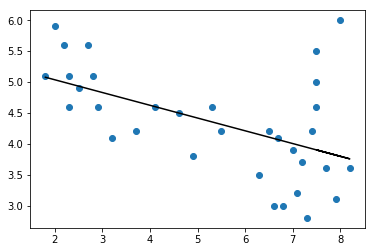

In [2]:
if __name__ == '__main__':
    #data path
    PATH = '4-data.txt'
    
    linear_regression(PATH)

# Promble 4

In [2]:
if __name__ == '__main__':
    #data path
    PATH = '5-trainingdata.txt'
    
    linear_regression(PATH)

0.0882355751799 0.58445771877
Train start...
iter 0:loss=5.50102385075
iter 1:loss=5.28095473128
iter 2:loss=5.07461770139
iter 3:loss=4.88115413892
iter 4:loss=4.69975910908
iter 5:loss=4.52967800752
iter 6:loss=4.37020341328
iter 7:loss=4.22067213852
iter 8:loss=4.0804624628
iter 9:loss=3.9489915402
iter 10:loss=3.82571296857
iter 11:loss=3.71011451087
iter 12:loss=3.60171595883
iter 13:loss=3.50006713037
iter 14:loss=3.40474599206
iter 15:loss=3.31535689909
iter 16:loss=3.2315289453
iter 17:loss=3.15291441627
iter 18:loss=3.07918733924
iter 19:loss=3.01004212366
iter 20:loss=2.94519228674
iter 21:loss=2.8843692587
iter 22:loss=2.82732126269
iter 23:loss=2.77381226482
iter 24:loss=2.72362098974
iter 25:loss=2.67653999789
iter 26:loss=2.63237482032
iter 27:loss=2.59094314771
iter 28:loss=2.55207407006
iter 29:loss=2.51560736391
iter 30:loss=2.48139282415
iter 31:loss=2.44928963759
iter 32:loss=2.41916579571
iter 33:loss=2.39089754411
iter 34:loss=2.36436886646
iter 35:loss=2.339471000

iter 580:loss=1.74789915801
iter 581:loss=1.74752061248
iter 582:loss=1.74714218559
iter 583:loss=1.74676387731
iter 584:loss=1.74638568759
iter 585:loss=1.74600761641
iter 586:loss=1.74562966371
iter 587:loss=1.74525182948
iter 588:loss=1.74487411366
iter 589:loss=1.74449651622
iter 590:loss=1.74411903713
iter 591:loss=1.74374167634
iter 592:loss=1.74336443383
iter 593:loss=1.74298730955
iter 594:loss=1.74261030346
iter 595:loss=1.74223341554
iter 596:loss=1.74185664573
iter 597:loss=1.74147999402
iter 598:loss=1.74110346034
iter 599:loss=1.74072704469
iter 600:loss=1.740350747
iter 601:loss=1.73997456725
iter 602:loss=1.7395985054
iter 603:loss=1.73922256142
iter 604:loss=1.73884673526
iter 605:loss=1.73847102689
iter 606:loss=1.73809543628
iter 607:loss=1.73771996338
iter 608:loss=1.73734460815
iter 609:loss=1.73696937057
iter 610:loss=1.7365942506
iter 611:loss=1.73621924819
iter 612:loss=1.73584436332
iter 613:loss=1.73546959593
iter 614:loss=1.73509494601
iter 615:loss=1.73472041

iter 2532:loss=1.19512000014
iter 2533:loss=1.19491470365
iter 2534:loss=1.1947094715
iter 2535:loss=1.19450430367
iter 2536:loss=1.19429920014
iter 2537:loss=1.1940941609
iter 2538:loss=1.19388918592
iter 2539:loss=1.19368427518
iter 2540:loss=1.19347942866
iter 2541:loss=1.19327464635
iter 2542:loss=1.19306992822
iter 2543:loss=1.19286527424
iter 2544:loss=1.19266068441
iter 2545:loss=1.19245615871
iter 2546:loss=1.1922516971
iter 2547:loss=1.19204729957
iter 2548:loss=1.19184296611
iter 2549:loss=1.19163869669
iter 2550:loss=1.19143449128
iter 2551:loss=1.19123034988
iter 2552:loss=1.19102627246
iter 2553:loss=1.190822259
iter 2554:loss=1.19061830948
iter 2555:loss=1.19041442388
iter 2556:loss=1.19021060219
iter 2557:loss=1.19000684437
iter 2558:loss=1.18980315041
iter 2559:loss=1.1895995203
iter 2560:loss=1.189395954
iter 2561:loss=1.18919245151
iter 2562:loss=1.18898901279
iter 2563:loss=1.18878563784
iter 2564:loss=1.18858232663
iter 2565:loss=1.18837907914
iter 2566:loss=1.18817

iter 4478:loss=0.896000194375
iter 4479:loss=0.895888646384
iter 4480:loss=0.895777133353
iter 4481:loss=0.895665655272
iter 4482:loss=0.89555421213
iter 4483:loss=0.895442803916
iter 4484:loss=0.895331430618
iter 4485:loss=0.895220092227
iter 4486:loss=0.895108788731
iter 4487:loss=0.894997520119
iter 4488:loss=0.89488628638
iter 4489:loss=0.894775087503
iter 4490:loss=0.894663923478
iter 4491:loss=0.894552794293
iter 4492:loss=0.894441699938
iter 4493:loss=0.894330640401
iter 4494:loss=0.894219615672
iter 4495:loss=0.89410862574
iter 4496:loss=0.893997670594
iter 4497:loss=0.893886750222
iter 4498:loss=0.893775864615
iter 4499:loss=0.893665013761
iter 4500:loss=0.893554197649
iter 4501:loss=0.893443416268
iter 4502:loss=0.893332669608
iter 4503:loss=0.893221957658
iter 4504:loss=0.893111280406
iter 4505:loss=0.893000637842
iter 4506:loss=0.892890029955
iter 4507:loss=0.892779456734
iter 4508:loss=0.892668918169
iter 4509:loss=0.892558414248
iter 4510:loss=0.89244794496
iter 4511:loss

iter 6056:loss=0.757118690661
iter 6057:loss=0.757050670154
iter 6058:loss=0.756982670967
iter 6059:loss=0.756914693091
iter 6060:loss=0.756846736521
iter 6061:loss=0.756778801249
iter 6062:loss=0.756710887269
iter 6063:loss=0.756642994574
iter 6064:loss=0.756575123158
iter 6065:loss=0.756507273013
iter 6066:loss=0.756439444134
iter 6067:loss=0.756371636514
iter 6068:loss=0.756303850145
iter 6069:loss=0.756236085022
iter 6070:loss=0.756168341137
iter 6071:loss=0.756100618484
iter 6072:loss=0.756032917056
iter 6073:loss=0.755965236847
iter 6074:loss=0.75589757785
iter 6075:loss=0.755829940059
iter 6076:loss=0.755762323465
iter 6077:loss=0.755694728064
iter 6078:loss=0.755627153849
iter 6079:loss=0.755559600812
iter 6080:loss=0.755492068947
iter 6081:loss=0.755424558248
iter 6082:loss=0.755357068707
iter 6083:loss=0.755289600319
iter 6084:loss=0.755222153076
iter 6085:loss=0.755154726972
iter 6086:loss=0.755087322001
iter 6087:loss=0.755019938155
iter 6088:loss=0.754952575428
iter 6089:l

iter 8031:loss=0.656944759457
iter 8032:loss=0.656908134919
iter 8033:loss=0.65687152186
iter 8034:loss=0.656834920276
iter 8035:loss=0.656798330163
iter 8036:loss=0.656761751518
iter 8037:loss=0.656725184338
iter 8038:loss=0.656688628618
iter 8039:loss=0.656652084355
iter 8040:loss=0.656615551546
iter 8041:loss=0.656579030187
iter 8042:loss=0.656542520274
iter 8043:loss=0.656506021804
iter 8044:loss=0.656469534773
iter 8045:loss=0.656433059178
iter 8046:loss=0.656396595014
iter 8047:loss=0.656360142279
iter 8048:loss=0.656323700969
iter 8049:loss=0.65628727108
iter 8050:loss=0.656250852608
iter 8051:loss=0.656214445551
iter 8052:loss=0.656178049904
iter 8053:loss=0.656141665664
iter 8054:loss=0.656105292828
iter 8055:loss=0.656068931391
iter 8056:loss=0.656032581351
iter 8057:loss=0.655996242703
iter 8058:loss=0.655959915444
iter 8059:loss=0.655923599571
iter 8060:loss=0.655887295079
iter 8061:loss=0.655851001966
iter 8062:loss=0.655814720228
iter 8063:loss=0.655778449861
iter 8064:lo

iter 9661:loss=0.610193721688
iter 9662:loss=0.610171749606
iter 9663:loss=0.61014978441
iter 9664:loss=0.610127826099
iter 9665:loss=0.61010587467
iter 9666:loss=0.61008393012
iter 9667:loss=0.610061992449
iter 9668:loss=0.610040061653
iter 9669:loss=0.61001813773
iter 9670:loss=0.609996220679
iter 9671:loss=0.609974310497
iter 9672:loss=0.609952407181
iter 9673:loss=0.609930510731
iter 9674:loss=0.609908621143
iter 9675:loss=0.609886738416
iter 9676:loss=0.609864862547
iter 9677:loss=0.609842993534
iter 9678:loss=0.609821131376
iter 9679:loss=0.609799276069
iter 9680:loss=0.609777427612
iter 9681:loss=0.609755586003
iter 9682:loss=0.609733751239
iter 9683:loss=0.609711923319
iter 9684:loss=0.60969010224
iter 9685:loss=0.609668287999
iter 9686:loss=0.609646480596
iter 9687:loss=0.609624680027
iter 9688:loss=0.609602886292
iter 9689:loss=0.609581099386
iter 9690:loss=0.609559319309
iter 9691:loss=0.609537546058
iter 9692:loss=0.609515779631
iter 9693:loss=0.609494020026
iter 9694:loss=

iter 11572:loss=0.578600312681
iter 11573:loss=0.578588242434
iter 11574:loss=0.578576175969
iter 11575:loss=0.578564113286
iter 11576:loss=0.578552054384
iter 11577:loss=0.578539999261
iter 11578:loss=0.578527947917
iter 11579:loss=0.57851590035
iter 11580:loss=0.578503856558
iter 11581:loss=0.578491816541
iter 11582:loss=0.578479780298
iter 11583:loss=0.578467747827
iter 11584:loss=0.578455719128
iter 11585:loss=0.578443694198
iter 11586:loss=0.578431673037
iter 11587:loss=0.578419655643
iter 11588:loss=0.578407642016
iter 11589:loss=0.578395632155
iter 11590:loss=0.578383626057
iter 11591:loss=0.578371623722
iter 11592:loss=0.578359625149
iter 11593:loss=0.578347630337
iter 11594:loss=0.578335639283
iter 11595:loss=0.578323651988
iter 11596:loss=0.57831166845
iter 11597:loss=0.578299688668
iter 11598:loss=0.57828771264
iter 11599:loss=0.578275740366
iter 11600:loss=0.578263771844
iter 11601:loss=0.578251807074
iter 11602:loss=0.578239846053
iter 11603:loss=0.578227888781
iter 11604:

iter 13539:loss=0.560876501435
iter 13540:loss=0.560869986088
iter 13541:loss=0.560863472783
iter 13542:loss=0.56085696152
iter 13543:loss=0.560850452297
iter 13544:loss=0.560843945114
iter 13545:loss=0.56083743997
iter 13546:loss=0.560830936866
iter 13547:loss=0.560824435799
iter 13548:loss=0.56081793677
iter 13549:loss=0.560811439778
iter 13550:loss=0.560804944823
iter 13551:loss=0.560798451903
iter 13552:loss=0.560791961017
iter 13553:loss=0.560785472167
iter 13554:loss=0.560778985349
iter 13555:loss=0.560772500565
iter 13556:loss=0.560766017814
iter 13557:loss=0.560759537094
iter 13558:loss=0.560753058405
iter 13559:loss=0.560746581747
iter 13560:loss=0.560740107119
iter 13561:loss=0.56073363452
iter 13562:loss=0.560727163949
iter 13563:loss=0.560720695407
iter 13564:loss=0.560714228891
iter 13565:loss=0.560707764403
iter 13566:loss=0.560701301941
iter 13567:loss=0.560694841504
iter 13568:loss=0.560688383091
iter 13569:loss=0.560681926703
iter 13570:loss=0.560675472339
iter 13571:l

iter 15532:loss=0.551218359702
iter 15533:loss=0.551214871357
iter 15534:loss=0.551211384105
iter 15535:loss=0.551207897947
iter 15536:loss=0.551204412881
iter 15537:loss=0.551200928907
iter 15538:loss=0.551197446025
iter 15539:loss=0.551193964235
iter 15540:loss=0.551190483536
iter 15541:loss=0.551187003928
iter 15542:loss=0.551183525411
iter 15543:loss=0.551180047984
iter 15544:loss=0.551176571646
iter 15545:loss=0.551173096398
iter 15546:loss=0.55116962224
iter 15547:loss=0.55116614917
iter 15548:loss=0.551162677189
iter 15549:loss=0.551159206296
iter 15550:loss=0.551155736491
iter 15551:loss=0.551152267773
iter 15552:loss=0.551148800142
iter 15553:loss=0.551145333598
iter 15554:loss=0.551141868141
iter 15555:loss=0.55113840377
iter 15556:loss=0.551134940484
iter 15557:loss=0.551131478284
iter 15558:loss=0.551128017169
iter 15559:loss=0.551124557139
iter 15560:loss=0.551121098194
iter 15561:loss=0.551117640332
iter 15562:loss=0.551114183554
iter 15563:loss=0.55111072786
iter 15564:l

iter 17443:loss=0.546202508015
iter 17444:loss=0.546200591711
iter 17445:loss=0.546198676007
iter 17446:loss=0.546196760905
iter 17447:loss=0.546194846402
iter 17448:loss=0.546192932499
iter 17449:loss=0.546191019197
iter 17450:loss=0.546189106494
iter 17451:loss=0.54618719439
iter 17452:loss=0.546185282886
iter 17453:loss=0.54618337198
iter 17454:loss=0.546181461674
iter 17455:loss=0.546179551966
iter 17456:loss=0.546177642857
iter 17457:loss=0.546175734347
iter 17458:loss=0.546173826434
iter 17459:loss=0.546171919119
iter 17460:loss=0.546170012403
iter 17461:loss=0.546168106283
iter 17462:loss=0.546166200761
iter 17463:loss=0.546164295837
iter 17464:loss=0.546162391509
iter 17465:loss=0.546160487778
iter 17466:loss=0.546158584644
iter 17467:loss=0.546156682107
iter 17468:loss=0.546154780165
iter 17469:loss=0.54615287882
iter 17470:loss=0.546150978071
iter 17471:loss=0.546149077917
iter 17472:loss=0.546147178359
iter 17473:loss=0.546145279396
iter 17474:loss=0.546143381029
iter 17475:

iter 19068:loss=0.54376210944
iter 19069:loss=0.543760957993
iter 19070:loss=0.543759806906
iter 19071:loss=0.543758656181
iter 19072:loss=0.543757505816
iter 19073:loss=0.543756355811
iter 19074:loss=0.543755206167
iter 19075:loss=0.543754056883
iter 19076:loss=0.543752907959
iter 19077:loss=0.543751759396
iter 19078:loss=0.543750611192
iter 19079:loss=0.543749463349
iter 19080:loss=0.543748315865
iter 19081:loss=0.54374716874
iter 19082:loss=0.543746021976
iter 19083:loss=0.54374487557
iter 19084:loss=0.543743729524
iter 19085:loss=0.543742583837
iter 19086:loss=0.543741438509
iter 19087:loss=0.543740293541
iter 19088:loss=0.543739148931
iter 19089:loss=0.543738004679
iter 19090:loss=0.543736860787
iter 19091:loss=0.543735717253
iter 19092:loss=0.543734574077
iter 19093:loss=0.543733431259
iter 19094:loss=0.5437322888
iter 19095:loss=0.543731146699
iter 19096:loss=0.543730004956
iter 19097:loss=0.54372886357
iter 19098:loss=0.543727722543
iter 19099:loss=0.543726581873
iter 19100:los

iter 21034:loss=0.54207195917
iter 21035:loss=0.542071337441
iter 21036:loss=0.542070715906
iter 21037:loss=0.542070094566
iter 21038:loss=0.542069473421
iter 21039:loss=0.54206885247
iter 21040:loss=0.542068231714
iter 21041:loss=0.542067611152
iter 21042:loss=0.542066990785
iter 21043:loss=0.542066370613
iter 21044:loss=0.542065750635
iter 21045:loss=0.542065130851
iter 21046:loss=0.542064511261
iter 21047:loss=0.542063891866
iter 21048:loss=0.542063272665
iter 21049:loss=0.542062653657
iter 21050:loss=0.542062034844
iter 21051:loss=0.542061416225
iter 21052:loss=0.542060797799
iter 21053:loss=0.542060179568
iter 21054:loss=0.54205956153
iter 21055:loss=0.542058943686
iter 21056:loss=0.542058326035
iter 21057:loss=0.542057708579
iter 21058:loss=0.542057091315
iter 21059:loss=0.542056474245
iter 21060:loss=0.542055857369
iter 21061:loss=0.542055240686
iter 21062:loss=0.542054624196
iter 21063:loss=0.542054007899
iter 21064:loss=0.542053391796
iter 21065:loss=0.542052775885
iter 21066:

iter 22653:loss=0.541282434984
iter 22654:loss=0.541282060702
iter 22655:loss=0.541281686538
iter 22656:loss=0.541281312491
iter 22657:loss=0.541280938562
iter 22658:loss=0.54128056475
iter 22659:loss=0.541280191054
iter 22660:loss=0.541279817476
iter 22661:loss=0.541279444015
iter 22662:loss=0.541279070671
iter 22663:loss=0.541278697445
iter 22664:loss=0.541278324335
iter 22665:loss=0.541277951342
iter 22666:loss=0.541277578466
iter 22667:loss=0.541277205706
iter 22668:loss=0.541276833064
iter 22669:loss=0.541276460538
iter 22670:loss=0.541276088129
iter 22671:loss=0.541275715837
iter 22672:loss=0.541275343662
iter 22673:loss=0.541274971603
iter 22674:loss=0.541274599661
iter 22675:loss=0.541274227835
iter 22676:loss=0.541273856126
iter 22677:loss=0.541273484534
iter 22678:loss=0.541273113057
iter 22679:loss=0.541272741698
iter 22680:loss=0.541272370454
iter 22681:loss=0.541271999327
iter 22682:loss=0.541271628317
iter 22683:loss=0.541271257422
iter 22684:loss=0.541270886644
iter 2268

iter 24495:loss=0.540758603913
iter 24496:loss=0.540758393807
iter 24497:loss=0.540758183768
iter 24498:loss=0.540757973795
iter 24499:loss=0.540757763887
iter 24500:loss=0.540757554046
iter 24501:loss=0.54075734427
iter 24502:loss=0.540757134559
iter 24503:loss=0.540756924915
iter 24504:loss=0.540756715336
iter 24505:loss=0.540756505823
iter 24506:loss=0.540756296375
iter 24507:loss=0.540756086994
iter 24508:loss=0.540755877677
iter 24509:loss=0.540755668427
iter 24510:loss=0.540755459242
iter 24511:loss=0.540755250122
iter 24512:loss=0.540755041068
iter 24513:loss=0.54075483208
iter 24514:loss=0.540754623157
iter 24515:loss=0.5407544143
iter 24516:loss=0.540754205508
iter 24517:loss=0.540753996781
iter 24518:loss=0.54075378812
iter 24519:loss=0.540753579524
iter 24520:loss=0.540753370994
iter 24521:loss=0.540753162529
iter 24522:loss=0.540752954129
iter 24523:loss=0.540752745795
iter 24524:loss=0.540752537526
iter 24525:loss=0.540752329322
iter 24526:loss=0.540752121184
iter 24527:lo

iter 26044:loss=0.540500748099
iter 26045:loss=0.540500618809
iter 26046:loss=0.540500489561
iter 26047:loss=0.540500360352
iter 26048:loss=0.540500231185
iter 26049:loss=0.540500102057
iter 26050:loss=0.540499972971
iter 26051:loss=0.540499843924
iter 26052:loss=0.540499714918
iter 26053:loss=0.540499585953
iter 26054:loss=0.540499457028
iter 26055:loss=0.540499328143
iter 26056:loss=0.540499199299
iter 26057:loss=0.540499070495
iter 26058:loss=0.540498941732
iter 26059:loss=0.540498813008
iter 26060:loss=0.540498684326
iter 26061:loss=0.540498555683
iter 26062:loss=0.540498427081
iter 26063:loss=0.540498298519
iter 26064:loss=0.540498169998
iter 26065:loss=0.540498041516
iter 26066:loss=0.540497913075
iter 26067:loss=0.540497784675
iter 26068:loss=0.540497656314
iter 26069:loss=0.540497527994
iter 26070:loss=0.540497399714
iter 26071:loss=0.540497271474
iter 26072:loss=0.540497143274
iter 26073:loss=0.540497015115
iter 26074:loss=0.540496886995
iter 26075:loss=0.540496758916
iter 260

iter 27641:loss=0.540338284291
iter 27642:loss=0.54033820592
iter 27643:loss=0.540338127574
iter 27644:loss=0.540338049252
iter 27645:loss=0.540337970955
iter 27646:loss=0.540337892682
iter 27647:loss=0.540337814434
iter 27648:loss=0.540337736211
iter 27649:loss=0.540337658012
iter 27650:loss=0.540337579837
iter 27651:loss=0.540337501687
iter 27652:loss=0.540337423562
iter 27653:loss=0.540337345461
iter 27654:loss=0.540337267384
iter 27655:loss=0.540337189332
iter 27656:loss=0.540337111305
iter 27657:loss=0.540337033302
iter 27658:loss=0.540336955323
iter 27659:loss=0.540336877369
iter 27660:loss=0.540336799439
iter 27661:loss=0.540336721533
iter 27662:loss=0.540336643652
iter 27663:loss=0.540336565796
iter 27664:loss=0.540336487964
iter 27665:loss=0.540336410156
iter 27666:loss=0.540336332373
iter 27667:loss=0.540336254614
iter 27668:loss=0.540336176879
iter 27669:loss=0.540336099169
iter 27670:loss=0.540336021483
iter 27671:loss=0.540335943821
iter 27672:loss=0.540335866184
iter 2767

iter 29491:loss=0.54022824775
iter 29492:loss=0.540228203867
iter 29493:loss=0.540228159997
iter 29494:loss=0.54022811614
iter 29495:loss=0.540228072298
iter 29496:loss=0.540228028469
iter 29497:loss=0.540227984654
iter 29498:loss=0.540227940853
iter 29499:loss=0.540227897065
iter 29500:loss=0.540227853292
iter 29501:loss=0.540227809532
iter 29502:loss=0.540227765785
iter 29503:loss=0.540227722053
iter 29504:loss=0.540227678334
iter 29505:loss=0.540227634628
iter 29506:loss=0.540227590937
iter 29507:loss=0.540227547259
iter 29508:loss=0.540227503595
iter 29509:loss=0.540227459944
iter 29510:loss=0.540227416308
iter 29511:loss=0.540227372684
iter 29512:loss=0.540227329075
iter 29513:loss=0.540227285479
iter 29514:loss=0.540227241897
iter 29515:loss=0.540227198329
iter 29516:loss=0.540227154774
iter 29517:loss=0.540227111233
iter 29518:loss=0.540227067705
iter 29519:loss=0.540227024191
iter 29520:loss=0.540226980691
iter 29521:loss=0.540226937204
iter 29522:loss=0.540226893732
iter 29523

iter 31041:loss=0.540174363551
iter 31042:loss=0.540174336556
iter 31043:loss=0.540174309569
iter 31044:loss=0.54017428259
iter 31045:loss=0.54017425562
iter 31046:loss=0.540174228658
iter 31047:loss=0.540174201705
iter 31048:loss=0.54017417476
iter 31049:loss=0.540174147823
iter 31050:loss=0.540174120895
iter 31051:loss=0.540174093976
iter 31052:loss=0.540174067064
iter 31053:loss=0.540174040162
iter 31054:loss=0.540174013268
iter 31055:loss=0.540173986382
iter 31056:loss=0.540173959504
iter 31057:loss=0.540173932635
iter 31058:loss=0.540173905775
iter 31059:loss=0.540173878923
iter 31060:loss=0.540173852079
iter 31061:loss=0.540173825244
iter 31062:loss=0.540173798417
iter 31063:loss=0.540173771598
iter 31064:loss=0.540173744788
iter 31065:loss=0.540173717986
iter 31066:loss=0.540173691193
iter 31067:loss=0.540173664408
iter 31068:loss=0.540173637632
iter 31069:loss=0.540173610864
iter 31070:loss=0.540173584104
iter 31071:loss=0.540173557353
iter 31072:loss=0.54017353061
iter 31073:l

iter 32950:loss=0.540135576538
iter 32951:loss=0.540135561699
iter 32952:loss=0.540135546864
iter 32953:loss=0.540135532034
iter 32954:loss=0.540135517209
iter 32955:loss=0.540135502388
iter 32956:loss=0.540135487572
iter 32957:loss=0.540135472761
iter 32958:loss=0.540135457954
iter 32959:loss=0.540135443152
iter 32960:loss=0.540135428355
iter 32961:loss=0.540135413562
iter 32962:loss=0.540135398774
iter 32963:loss=0.540135383991
iter 32964:loss=0.540135369212
iter 32965:loss=0.540135354437
iter 32966:loss=0.540135339668
iter 32967:loss=0.540135324903
iter 32968:loss=0.540135310143
iter 32969:loss=0.540135295387
iter 32970:loss=0.540135280636
iter 32971:loss=0.540135265889
iter 32972:loss=0.540135251147
iter 32973:loss=0.54013523641
iter 32974:loss=0.540135221678
iter 32975:loss=0.54013520695
iter 32976:loss=0.540135192226
iter 32977:loss=0.540135177508
iter 32978:loss=0.540135162793
iter 32979:loss=0.540135148084
iter 32980:loss=0.540135133379
iter 32981:loss=0.540135118679
iter 32982

iter 34508:loss=0.540117282742
iter 34509:loss=0.540117273637
iter 34510:loss=0.540117264534
iter 34511:loss=0.540117255434
iter 34512:loss=0.540117246337
iter 34513:loss=0.540117237243
iter 34514:loss=0.540117228151
iter 34515:loss=0.540117219063
iter 34516:loss=0.540117209977
iter 34517:loss=0.540117200894
iter 34518:loss=0.540117191814
iter 34519:loss=0.540117182737
iter 34520:loss=0.540117173663
iter 34521:loss=0.540117164591
iter 34522:loss=0.540117155523
iter 34523:loss=0.540117146457
iter 34524:loss=0.540117137394
iter 34525:loss=0.540117128334
iter 34526:loss=0.540117119276
iter 34527:loss=0.540117110222
iter 34528:loss=0.54011710117
iter 34529:loss=0.540117092122
iter 34530:loss=0.540117083076
iter 34531:loss=0.540117074033
iter 34532:loss=0.540117064992
iter 34533:loss=0.540117055955
iter 34534:loss=0.54011704692
iter 34535:loss=0.540117037889
iter 34536:loss=0.54011702886
iter 34537:loss=0.540117019834
iter 34538:loss=0.54011701081
iter 34539:loss=0.54011700179
iter 34540:lo

iter 36104:loss=0.540105846174
iter 36105:loss=0.540105840653
iter 36106:loss=0.540105835133
iter 36107:loss=0.540105829615
iter 36108:loss=0.540105824099
iter 36109:loss=0.540105818585
iter 36110:loss=0.540105813072
iter 36111:loss=0.540105807561
iter 36112:loss=0.540105802052
iter 36113:loss=0.540105796545
iter 36114:loss=0.540105791039
iter 36115:loss=0.540105785535
iter 36116:loss=0.540105780033
iter 36117:loss=0.540105774532
iter 36118:loss=0.540105769033
iter 36119:loss=0.540105763536
iter 36120:loss=0.540105758041
iter 36121:loss=0.540105752547
iter 36122:loss=0.540105747055
iter 36123:loss=0.540105741565
iter 36124:loss=0.540105736077
iter 36125:loss=0.54010573059
iter 36126:loss=0.540105725105
iter 36127:loss=0.540105719622
iter 36128:loss=0.54010571414
iter 36129:loss=0.54010570866
iter 36130:loss=0.540105703182
iter 36131:loss=0.540105697705
iter 36132:loss=0.540105692231
iter 36133:loss=0.540105686758
iter 36134:loss=0.540105681286
iter 36135:loss=0.540105675817
iter 36136:

iter 37982:loss=0.54009800783
iter 37983:loss=0.540098004766
iter 37984:loss=0.540098001702
iter 37985:loss=0.540097998639
iter 37986:loss=0.540097995578
iter 37987:loss=0.540097992517
iter 37988:loss=0.540097989457
iter 37989:loss=0.540097986398
iter 37990:loss=0.54009798334
iter 37991:loss=0.540097980283
iter 37992:loss=0.540097977227
iter 37993:loss=0.540097974172
iter 37994:loss=0.540097971118
iter 37995:loss=0.540097968065
iter 37996:loss=0.540097965013
iter 37997:loss=0.540097961962
iter 37998:loss=0.540097958911
iter 37999:loss=0.540097955862
iter 38000:loss=0.540097952814
iter 38001:loss=0.540097949766
iter 38002:loss=0.54009794672
iter 38003:loss=0.540097943675
iter 38004:loss=0.54009794063
iter 38005:loss=0.540097937586
iter 38006:loss=0.540097934544
iter 38007:loss=0.540097931502
iter 38008:loss=0.540097928462
iter 38009:loss=0.540097925422
iter 38010:loss=0.540097922383
iter 38011:loss=0.540097919345
iter 38012:loss=0.540097916308
iter 38013:loss=0.540097913272
iter 38014:l

iter 39475:loss=0.540094353269
iter 39476:loss=0.54009435135
iter 39477:loss=0.540094349431
iter 39478:loss=0.540094347513
iter 39479:loss=0.540094345596
iter 39480:loss=0.540094343679
iter 39481:loss=0.540094341763
iter 39482:loss=0.540094339847
iter 39483:loss=0.540094337932
iter 39484:loss=0.540094336018
iter 39485:loss=0.540094334104
iter 39486:loss=0.540094332191
iter 39487:loss=0.540094330278
iter 39488:loss=0.540094328366
iter 39489:loss=0.540094326455
iter 39490:loss=0.540094324544
iter 39491:loss=0.540094322634
iter 39492:loss=0.540094320724
iter 39493:loss=0.540094318815
iter 39494:loss=0.540094316907
iter 39495:loss=0.540094314999
iter 39496:loss=0.540094313092
iter 39497:loss=0.540094311185
iter 39498:loss=0.540094309279
iter 39499:loss=0.540094307373
iter 39500:loss=0.540094305469
iter 39501:loss=0.540094303564
iter 39502:loss=0.540094301661
iter 39503:loss=0.540094299758
iter 39504:loss=0.540094297855
iter 39505:loss=0.540094295953
iter 39506:loss=0.540094294052
iter 3950

iter 40972:loss=0.540092059785
iter 40973:loss=0.540092058585
iter 40974:loss=0.540092057385
iter 40975:loss=0.540092056185
iter 40976:loss=0.540092054986
iter 40977:loss=0.540092053787
iter 40978:loss=0.540092052588
iter 40979:loss=0.54009205139
iter 40980:loss=0.540092050192
iter 40981:loss=0.540092048995
iter 40982:loss=0.540092047798
iter 40983:loss=0.540092046601
iter 40984:loss=0.540092045405
iter 40985:loss=0.540092044209
iter 40986:loss=0.540092043013
iter 40987:loss=0.540092041818
iter 40988:loss=0.540092040623
iter 40989:loss=0.540092039429
iter 40990:loss=0.540092038235
iter 40991:loss=0.540092037041
iter 40992:loss=0.540092035848
iter 40993:loss=0.540092034655
iter 40994:loss=0.540092033463
iter 40995:loss=0.54009203227
iter 40996:loss=0.540092031079
iter 40997:loss=0.540092029887
iter 40998:loss=0.540092028696
iter 40999:loss=0.540092027506
iter 41000:loss=0.540092026315
iter 41001:loss=0.540092025125
iter 41002:loss=0.540092023936
iter 41003:loss=0.540092022747
iter 41004

iter 42457:loss=0.540090634312
iter 42458:loss=0.540090633559
iter 42459:loss=0.540090632805
iter 42460:loss=0.540090632052
iter 42461:loss=0.540090631299
iter 42462:loss=0.540090630546
iter 42463:loss=0.540090629794
iter 42464:loss=0.540090629042
iter 42465:loss=0.54009062829
iter 42466:loss=0.540090627538
iter 42467:loss=0.540090626786
iter 42468:loss=0.540090626035
iter 42469:loss=0.540090625284
iter 42470:loss=0.540090624533
iter 42471:loss=0.540090623783
iter 42472:loss=0.540090623032
iter 42473:loss=0.540090622282
iter 42474:loss=0.540090621532
iter 42475:loss=0.540090620783
iter 42476:loss=0.540090620033
iter 42477:loss=0.540090619284
iter 42478:loss=0.540090618535
iter 42479:loss=0.540090617786
iter 42480:loss=0.540090617038
iter 42481:loss=0.54009061629
iter 42482:loss=0.540090615542
iter 42483:loss=0.540090614794
iter 42484:loss=0.540090614046
iter 42485:loss=0.540090613299
iter 42486:loss=0.540090612552
iter 42487:loss=0.540090611805
iter 42488:loss=0.540090611059
iter 42489

iter 44012:loss=0.540089706599
iter 44013:loss=0.540089706136
iter 44014:loss=0.540089705673
iter 44015:loss=0.540089705211
iter 44016:loss=0.540089704748
iter 44017:loss=0.540089704286
iter 44018:loss=0.540089703824
iter 44019:loss=0.540089703362
iter 44020:loss=0.5400897029
iter 44021:loss=0.540089702438
iter 44022:loss=0.540089701977
iter 44023:loss=0.540089701515
iter 44024:loss=0.540089701054
iter 44025:loss=0.540089700593
iter 44026:loss=0.540089700132
iter 44027:loss=0.540089699671
iter 44028:loss=0.54008969921
iter 44029:loss=0.54008969875
iter 44030:loss=0.540089698289
iter 44031:loss=0.540089697829
iter 44032:loss=0.540089697369
iter 44033:loss=0.540089696909
iter 44034:loss=0.540089696449
iter 44035:loss=0.540089695989
iter 44036:loss=0.54008969553
iter 44037:loss=0.54008969507
iter 44038:loss=0.540089694611
iter 44039:loss=0.540089694152
iter 44040:loss=0.540089693693
iter 44041:loss=0.540089693234
iter 44042:loss=0.540089692775
iter 44043:loss=0.540089692317
iter 44044:los

iter 45608:loss=0.540089125214
iter 45609:loss=0.540089124934
iter 45610:loss=0.540089124653
iter 45611:loss=0.540089124373
iter 45612:loss=0.540089124092
iter 45613:loss=0.540089123812
iter 45614:loss=0.540089123532
iter 45615:loss=0.540089123252
iter 45616:loss=0.540089122972
iter 45617:loss=0.540089122692
iter 45618:loss=0.540089122412
iter 45619:loss=0.540089122132
iter 45620:loss=0.540089121852
iter 45621:loss=0.540089121573
iter 45622:loss=0.540089121293
iter 45623:loss=0.540089121014
iter 45624:loss=0.540089120734
iter 45625:loss=0.540089120455
iter 45626:loss=0.540089120176
iter 45627:loss=0.540089119897
iter 45628:loss=0.540089119618
iter 45629:loss=0.540089119339
iter 45630:loss=0.54008911906
iter 45631:loss=0.540089118781
iter 45632:loss=0.540089118502
iter 45633:loss=0.540089118224
iter 45634:loss=0.540089117945
iter 45635:loss=0.540089117667
iter 45636:loss=0.540089117389
iter 45637:loss=0.54008911711
iter 45638:loss=0.540089116832
iter 45639:loss=0.540089116554
iter 45640

iter 47520:loss=0.540088721478
iter 47521:loss=0.540088721324
iter 47522:loss=0.54008872117
iter 47523:loss=0.540088721016
iter 47524:loss=0.540088720862
iter 47525:loss=0.540088720708
iter 47526:loss=0.540088720554
iter 47527:loss=0.5400887204
iter 47528:loss=0.540088720246
iter 47529:loss=0.540088720093
iter 47530:loss=0.540088719939
iter 47531:loss=0.540088719785
iter 47532:loss=0.540088719632
iter 47533:loss=0.540088719478
iter 47534:loss=0.540088719325
iter 47535:loss=0.540088719171
iter 47536:loss=0.540088719018
iter 47537:loss=0.540088718864
iter 47538:loss=0.540088718711
iter 47539:loss=0.540088718558
iter 47540:loss=0.540088718404
iter 47541:loss=0.540088718251
iter 47542:loss=0.540088718098
iter 47543:loss=0.540088717945
iter 47544:loss=0.540088717792
iter 47545:loss=0.540088717639
iter 47546:loss=0.540088717486
iter 47547:loss=0.540088717333
iter 47548:loss=0.54008871718
iter 47549:loss=0.540088717028
iter 47550:loss=0.540088716875
iter 47551:loss=0.540088716722
iter 47552:l

iter 49333:loss=0.54008850827
iter 49334:loss=0.540088508183
iter 49335:loss=0.540088508096
iter 49336:loss=0.540088508008
iter 49337:loss=0.540088507921
iter 49338:loss=0.540088507834
iter 49339:loss=0.540088507747
iter 49340:loss=0.54008850766
iter 49341:loss=0.540088507572
iter 49342:loss=0.540088507485
iter 49343:loss=0.540088507398
iter 49344:loss=0.540088507311
iter 49345:loss=0.540088507224
iter 49346:loss=0.540088507137
iter 49347:loss=0.54008850705
iter 49348:loss=0.540088506963
iter 49349:loss=0.540088506876
iter 49350:loss=0.54008850679
iter 49351:loss=0.540088506703
iter 49352:loss=0.540088506616
iter 49353:loss=0.540088506529
iter 49354:loss=0.540088506442
iter 49355:loss=0.540088506356
iter 49356:loss=0.540088506269
iter 49357:loss=0.540088506182
iter 49358:loss=0.540088506095
iter 49359:loss=0.540088506009
iter 49360:loss=0.540088505922
iter 49361:loss=0.540088505836
iter 49362:loss=0.540088505749
iter 49363:loss=0.540088505663
iter 49364:loss=0.540088505576
iter 49365:l

# Test loss

In [8]:
TEST_PATH = '5-testdata.txt'
a = -0.134711376062
b = 4.90467343029
def loss(X, y, a, b):
    N = len(X)
    loss = 0.5/N * np.sum((y - a*X - b)**2)
    return loss
def test_old(TEST_PATH, a, b):
    X_test, y_test = load_data(TEST_PATH)
    return loss(X_test, y_test, a, b)
test_loss_old = test_old(TEST_PATH, a, b)
print 'a = '+str(a)
print 'b = '+str(b)
print 'loss: '+str(test_loss_old)

a = -0.134711376062
b = 4.90467343029
loss: 0.14696355010319878


# Huber Loss function
https://en.wikipedia.org/wiki/Huber_loss

In [3]:
def Huber(X, y, a, b, sigma):
    N = len(X)
    #residuals
    res = y - a*X - b
    res_abs = np.abs(res)
    idx_l = [res_abs<=sigma]
    idx_g = [res_abs>sigma]
    loss = 0.5*np.sum(res[idx_l]**2) + sigma * np.sum(res_abs[idx_g] - 0.5*sigma)
    loss /= N
    db = 1.0/N * (-np.sum(res[idx_l]) + sigma * (-np.sum(np.sign(res[idx_g]))))
    da = -np.sum(X[idx_l]*res[idx_l]) + sigma *(-np.sum(X[idx_g]))
    da /= N
    return loss, da, db

# Implementation

In [5]:
import numpy as np
import matplotlib.pylab as pl
import random

def Huber(X, y, a, b, sigma):
    N = len(X)
    #residuals
    res = y - a*X - b
    res_abs = np.abs(res)
    idx_l = [res_abs<=sigma]
    idx_g = [res_abs>sigma]
    loss = 0.5*np.sum(res[idx_l]**2) + sigma * np.sum(res_abs[idx_g] - 0.5*sigma)
    loss /= N
    db = 1.0/N * (-np.sum(res[idx_l]) + sigma * (-np.sum(np.sign(res[idx_g]))))
    da = -np.sum(X[idx_l]*res[idx_l]) + sigma *(-np.sum(X[idx_g]*np.sign(res[idx_g])))
    da /= N
    return loss, da, db

def opt(X, y, a, b, learning_rate, num_iter, sigma, browse = True):
#     a_update, b_update = 0.0, 0.0
    for i in range(num_iter):
        loss, da, db = Huber(X, y, a, b, sigma)
        #update a, b
        a -= learning_rate * da
        b -= learning_rate * db
        if browse:
            print 'iter {0}:loss={1}'.format(i,loss)
    return loss, a, b
def test_huber(TEST_PATH, a, b, sigma):
    X_test, y_test = load_data(TEST_PATH)
    loss, _, _ = Huber(X_test, y_test, a, b, sigma)
    return loss
def load_data(PATH):
    data =np.loadtxt(PATH, skiprows=1)
    X, y = data[:,0], data[:,1]
    X /=10.0
    y /=100.0
    return X, y

def linear_regression_huber(PATH, sigma):
    #hyperparameter
    learning_rate = 0.001
    a_init = random.random()
    b_init = random.random()
#     sigma = 2.5
    num_iter = 50000
    print a_init, b_init
    #load data
    X, y = load_data(PATH)
    
    #train
    print 'Train start...'
    loss, a, b = opt(X, y, a_init, b_init, learning_rate, num_iter, sigma)
    print 'Result:\n a = {0}\n b = {1}\n loss = {2}\n'.format(a, b, loss)
    
    #plot
    y_p = a*X + b
    pl.plot(X, y, 'o')
    pl.plot(X, y_p, 'k-')
    pl.show()
    return a, b

In [7]:
TRAIN_PATH = '5-trainingdata.txt'
TEST_PATH = '5-testdata.txt'
sigma = 1
a, b = linear_regression_huber(TRAIN_PATH, sigma)
test_loss = test_huber(TEST_PATH, a, b, sigma)
print 'Test loss:'+str(test_loss)

0.505835048047 0.152031648259
Train start...
iter 0:loss=1.37918528338
iter 1:loss=1.37716766597
iter 2:loss=1.37522484005
iter 3:loss=1.37335393252
iter 4:loss=1.37155218065
iter 5:loss=1.36981692783
iter 6:loss=1.36814561953
iter 7:loss=1.36653579935
iter 8:loss=1.36498510526
iter 9:loss=1.36349126594
iter 10:loss=1.36205209737
iter 11:loss=1.36066549939
iter 12:loss=1.35932945257
iter 13:loss=1.358042015
iter 14:loss=1.35680131942
iter 15:loss=1.35560557027
iter 16:loss=1.354453041
iter 17:loss=1.35334207135
iter 18:loss=1.35227106488
iter 19:loss=1.35123848645
iter 20:loss=1.3502428599
iter 21:loss=1.3492827658
iter 22:loss=1.34835683921
iter 23:loss=1.34746376767
iter 24:loss=1.34660228911
iter 25:loss=1.34577118995
iter 26:loss=1.34496930324
iter 27:loss=1.34419550684
iter 28:loss=1.34344872175
iter 29:loss=1.34272791038
iter 30:loss=1.34203207505
iter 31:loss=1.34136025636
iter 32:loss=1.34071155468
iter 33:loss=1.34008555101
iter 34:loss=1.33948176668
iter 35:loss=1.33889931432

iter 510:loss=1.29312910984
iter 511:loss=1.29306230661
iter 512:loss=1.29299550622
iter 513:loss=1.29292870865
iter 514:loss=1.29286191392
iter 515:loss=1.29279512202
iter 516:loss=1.29272833294
iter 517:loss=1.2926615467
iter 518:loss=1.29259476328
iter 519:loss=1.29252798269
iter 520:loss=1.29246120493
iter 521:loss=1.29239443
iter 522:loss=1.29232765789
iter 523:loss=1.29226088861
iter 524:loss=1.29219412216
iter 525:loss=1.29212735854
iter 526:loss=1.29206059774
iter 527:loss=1.29199383977
iter 528:loss=1.29192708462
iter 529:loss=1.2918603323
iter 530:loss=1.2917935828
iter 531:loss=1.29172683613
iter 532:loss=1.29166009228
iter 533:loss=1.29159335126
iter 534:loss=1.29152661306
iter 535:loss=1.29145987769
iter 536:loss=1.29139314514
iter 537:loss=1.29132641541
iter 538:loss=1.29125968851
iter 539:loss=1.29119296443
iter 540:loss=1.29112624317
iter 541:loss=1.29105952474
iter 542:loss=1.29099280912
iter 543:loss=1.29092609633
iter 544:loss=1.29085938636
iter 545:loss=1.2907926792

iter 2475:loss=1.1672994959
iter 2476:loss=1.16723818706
iter 2477:loss=1.16717688093
iter 2478:loss=1.16711557749
iter 2479:loss=1.16705427675
iter 2480:loss=1.1669929787
iter 2481:loss=1.16693168336
iter 2482:loss=1.16687039071
iter 2483:loss=1.16680910076
iter 2484:loss=1.16674781351
iter 2485:loss=1.16668652896
iter 2486:loss=1.1666252471
iter 2487:loss=1.16656396794
iter 2488:loss=1.16650269148
iter 2489:loss=1.16644141771
iter 2490:loss=1.16638014664
iter 2491:loss=1.16631887827
iter 2492:loss=1.1662576126
iter 2493:loss=1.16619634962
iter 2494:loss=1.16613508934
iter 2495:loss=1.16607383175
iter 2496:loss=1.16601257686
iter 2497:loss=1.16595132467
iter 2498:loss=1.16589007517
iter 2499:loss=1.16582882837
iter 2500:loss=1.16576758426
iter 2501:loss=1.16570634285
iter 2502:loss=1.16564510414
iter 2503:loss=1.16558386812
iter 2504:loss=1.16552263479
iter 2505:loss=1.16546140416
iter 2506:loss=1.16540017623
iter 2507:loss=1.16533895099
iter 2508:loss=1.16527772845
iter 2509:loss=1.1

iter 4482:loss=1.04952835782
iter 4483:loss=1.04947223256
iter 4484:loss=1.04941610976
iter 4485:loss=1.04935998944
iter 4486:loss=1.04930387158
iter 4487:loss=1.04924775619
iter 4488:loss=1.04919164328
iter 4489:loss=1.04913553283
iter 4490:loss=1.04907942486
iter 4491:loss=1.04902331935
iter 4492:loss=1.04896721631
iter 4493:loss=1.04891111575
iter 4494:loss=1.04885501765
iter 4495:loss=1.04879892202
iter 4496:loss=1.04874282886
iter 4497:loss=1.04868673817
iter 4498:loss=1.04863064994
iter 4499:loss=1.04857456419
iter 4500:loss=1.0485184809
iter 4501:loss=1.04846240009
iter 4502:loss=1.04840632174
iter 4503:loss=1.04835024586
iter 4504:loss=1.04829417244
iter 4505:loss=1.0482381015
iter 4506:loss=1.04818203302
iter 4507:loss=1.04812596701
iter 4508:loss=1.04806990347
iter 4509:loss=1.0480138424
iter 4510:loss=1.04795778379
iter 4511:loss=1.04790172765
iter 4512:loss=1.04784567398
iter 4513:loss=1.04778962278
iter 4514:loss=1.04773357404
iter 4515:loss=1.04767752777
iter 4516:loss=1.

iter 6479:loss=0.939164541837
iter 6480:loss=0.939109907012
iter 6481:loss=0.93905527286
iter 6482:loss=0.939000639381
iter 6483:loss=0.938946006574
iter 6484:loss=0.938891374439
iter 6485:loss=0.938836742977
iter 6486:loss=0.938782112188
iter 6487:loss=0.938727482071
iter 6488:loss=0.938672852626
iter 6489:loss=0.938618223854
iter 6490:loss=0.938563595754
iter 6491:loss=0.938508968327
iter 6492:loss=0.938454341572
iter 6493:loss=0.938399715489
iter 6494:loss=0.938345090079
iter 6495:loss=0.938290465341
iter 6496:loss=0.938235841276
iter 6497:loss=0.938181217883
iter 6498:loss=0.938126595162
iter 6499:loss=0.938071973114
iter 6500:loss=0.938017351738
iter 6501:loss=0.937962731034
iter 6502:loss=0.937908111003
iter 6503:loss=0.937853491644
iter 6504:loss=0.937798872957
iter 6505:loss=0.937744254943
iter 6506:loss=0.937689637601
iter 6507:loss=0.937635020931
iter 6508:loss=0.937580404933
iter 6509:loss=0.937525789608
iter 6510:loss=0.937471174955
iter 6511:loss=0.937416560974
iter 6512:l

iter 8418:loss=0.834655326964
iter 8419:loss=0.834602343571
iter 8420:loss=0.834549361674
iter 8421:loss=0.834496381271
iter 8422:loss=0.834443402363
iter 8423:loss=0.83439042495
iter 8424:loss=0.834337449032
iter 8425:loss=0.834284474608
iter 8426:loss=0.834231501679
iter 8427:loss=0.834178530245
iter 8428:loss=0.834125560305
iter 8429:loss=0.83407259186
iter 8430:loss=0.834019624909
iter 8431:loss=0.833966659452
iter 8432:loss=0.83391369549
iter 8433:loss=0.833860733023
iter 8434:loss=0.833807772049
iter 8435:loss=0.83375481257
iter 8436:loss=0.833701854586
iter 8437:loss=0.833648898095
iter 8438:loss=0.833595943098
iter 8439:loss=0.833542989596
iter 8440:loss=0.833490037588
iter 8441:loss=0.833437087073
iter 8442:loss=0.833384138053
iter 8443:loss=0.833331190526
iter 8444:loss=0.833278244494
iter 8445:loss=0.833225299955
iter 8446:loss=0.83317235691
iter 8447:loss=0.833119415359
iter 8448:loss=0.833066475301
iter 8449:loss=0.833013536738
iter 8450:loss=0.832960599667
iter 8451:loss=

iter 10102:loss=0.748689224116
iter 10103:loss=0.748640278926
iter 10104:loss=0.748591336188
iter 10105:loss=0.748542395901
iter 10106:loss=0.748493458065
iter 10107:loss=0.74844452268
iter 10108:loss=0.748395589747
iter 10109:loss=0.748346659264
iter 10110:loss=0.748297731232
iter 10111:loss=0.74824880565
iter 10112:loss=0.748199882519
iter 10113:loss=0.748150961838
iter 10114:loss=0.748102043608
iter 10115:loss=0.748053127828
iter 10116:loss=0.748004214497
iter 10117:loss=0.747955303617
iter 10118:loss=0.747906395186
iter 10119:loss=0.747857489205
iter 10120:loss=0.747808585674
iter 10121:loss=0.747759684592
iter 10122:loss=0.747710785959
iter 10123:loss=0.747661889775
iter 10124:loss=0.74761299604
iter 10125:loss=0.747564104754
iter 10126:loss=0.747515215917
iter 10127:loss=0.747466329529
iter 10128:loss=0.747417445589
iter 10129:loss=0.747368564098
iter 10130:loss=0.747319685054
iter 10131:loss=0.747270808459
iter 10132:loss=0.747221934312
iter 10133:loss=0.747173062613
iter 10134:

iter 11975:loss=0.661193682686
iter 11976:loss=0.661149214312
iter 11977:loss=0.661104748525
iter 11978:loss=0.661060285326
iter 11979:loss=0.661015824715
iter 11980:loss=0.66097136669
iter 11981:loss=0.660926911253
iter 11982:loss=0.660882458404
iter 11983:loss=0.66083800814
iter 11984:loss=0.660793560464
iter 11985:loss=0.660749115375
iter 11986:loss=0.660704672871
iter 11987:loss=0.660660232954
iter 11988:loss=0.660615795624
iter 11989:loss=0.660571360879
iter 11990:loss=0.66052692872
iter 11991:loss=0.660482499146
iter 11992:loss=0.660438072159
iter 11993:loss=0.660393647756
iter 11994:loss=0.660349225939
iter 11995:loss=0.660304806707
iter 11996:loss=0.66026039006
iter 11997:loss=0.660215975998
iter 11998:loss=0.66017156452
iter 11999:loss=0.660127155627
iter 12000:loss=0.660082749318
iter 12001:loss=0.660038345593
iter 12002:loss=0.659993944453
iter 12003:loss=0.659949545896
iter 12004:loss=0.659905149923
iter 12005:loss=0.659860756534
iter 12006:loss=0.659816365728
iter 12007:lo

iter 13695:loss=0.588416927817
iter 13696:loss=0.588376800021
iter 13697:loss=0.588336675284
iter 13698:loss=0.588296553604
iter 13699:loss=0.588256434983
iter 13700:loss=0.588216319419
iter 13701:loss=0.588176206913
iter 13702:loss=0.588136097464
iter 13703:loss=0.588095991072
iter 13704:loss=0.588055887736
iter 13705:loss=0.588015787457
iter 13706:loss=0.587975690235
iter 13707:loss=0.587935596068
iter 13708:loss=0.587895504957
iter 13709:loss=0.587855416901
iter 13710:loss=0.587815331901
iter 13711:loss=0.587775249956
iter 13712:loss=0.587735171066
iter 13713:loss=0.58769509523
iter 13714:loss=0.587655022449
iter 13715:loss=0.587614952722
iter 13716:loss=0.587574886048
iter 13717:loss=0.587534822429
iter 13718:loss=0.587494761863
iter 13719:loss=0.58745470435
iter 13720:loss=0.58741464989
iter 13721:loss=0.587374598482
iter 13722:loss=0.587334550128
iter 13723:loss=0.587294504825
iter 13724:loss=0.587254462575
iter 13725:loss=0.587214423376
iter 13726:loss=0.587174387229
iter 13727:

iter 15399:loss=0.525071328443
iter 15400:loss=0.525037282255
iter 15401:loss=0.525003239634
iter 15402:loss=0.524969200581
iter 15403:loss=0.524935165096
iter 15404:loss=0.524901133177
iter 15405:loss=0.524867104825
iter 15406:loss=0.524833080039
iter 15407:loss=0.524799058819
iter 15408:loss=0.524765041164
iter 15409:loss=0.524731027075
iter 15410:loss=0.52469701655
iter 15411:loss=0.524663009589
iter 15412:loss=0.524629006193
iter 15413:loss=0.52459500636
iter 15414:loss=0.52456101009
iter 15415:loss=0.524527017383
iter 15416:loss=0.524493028239
iter 15417:loss=0.524459042657
iter 15418:loss=0.524425060636
iter 15419:loss=0.524391082177
iter 15420:loss=0.524357107278
iter 15421:loss=0.524323135941
iter 15422:loss=0.524289168163
iter 15423:loss=0.524255203946
iter 15424:loss=0.524221243287
iter 15425:loss=0.524187286188
iter 15426:loss=0.524153332648
iter 15427:loss=0.524119382666
iter 15428:loss=0.524085436242
iter 15429:loss=0.524051493376
iter 15430:loss=0.524017554067
iter 15431:

iter 16911:loss=0.477489659629
iter 16912:loss=0.47746078701
iter 16913:loss=0.47743191807
iter 16914:loss=0.477403052809
iter 16915:loss=0.477374191226
iter 16916:loss=0.477345333321
iter 16917:loss=0.477316479092
iter 16918:loss=0.47728762854
iter 16919:loss=0.477258781665
iter 16920:loss=0.477229938465
iter 16921:loss=0.47720109894
iter 16922:loss=0.47717226309
iter 16923:loss=0.477143430915
iter 16924:loss=0.477114602413
iter 16925:loss=0.477085777585
iter 16926:loss=0.477056956429
iter 16927:loss=0.477028138946
iter 16928:loss=0.476999325135
iter 16929:loss=0.476970514995
iter 16930:loss=0.476941708526
iter 16931:loss=0.476912905728
iter 16932:loss=0.4768841066
iter 16933:loss=0.476855311142
iter 16934:loss=0.476826519353
iter 16935:loss=0.476797731232
iter 16936:loss=0.47676894678
iter 16937:loss=0.476740165995
iter 16938:loss=0.476711388878
iter 16939:loss=0.476682615427
iter 16940:loss=0.476653845643
iter 16941:loss=0.476625079525
iter 16942:loss=0.476596317072
iter 16943:loss=

iter 18435:loss=0.437494206494
iter 18436:loss=0.437470430138
iter 18437:loss=0.437446656812
iter 18438:loss=0.437422886515
iter 18439:loss=0.437399119247
iter 18440:loss=0.437375355007
iter 18441:loss=0.437351593796
iter 18442:loss=0.437327835612
iter 18443:loss=0.437304080455
iter 18444:loss=0.437280328325
iter 18445:loss=0.437256579222
iter 18446:loss=0.437232833145
iter 18447:loss=0.437209090094
iter 18448:loss=0.437185350068
iter 18449:loss=0.437161613067
iter 18450:loss=0.43713787909
iter 18451:loss=0.437114148138
iter 18452:loss=0.43709042021
iter 18453:loss=0.437066695305
iter 18454:loss=0.437042973423
iter 18455:loss=0.437019254564
iter 18456:loss=0.436995538727
iter 18457:loss=0.436971825912
iter 18458:loss=0.436948116118
iter 18459:loss=0.436924409346
iter 18460:loss=0.436900705594
iter 18461:loss=0.436877004863
iter 18462:loss=0.436853307151
iter 18463:loss=0.43682961246
iter 18464:loss=0.436805920787
iter 18465:loss=0.436782232133
iter 18466:loss=0.436758546498
iter 18467:

iter 19987:loss=0.405362983241
iter 19988:loss=0.40534530864
iter 19989:loss=0.405327637581
iter 19990:loss=0.405309970063
iter 19991:loss=0.405292306084
iter 19992:loss=0.405274645644
iter 19993:loss=0.405256988743
iter 19994:loss=0.40523933538
iter 19995:loss=0.405221685553
iter 19996:loss=0.405204039263
iter 19997:loss=0.405186396509
iter 19998:loss=0.405168757289
iter 19999:loss=0.405151121603
iter 20000:loss=0.405133489451
iter 20001:loss=0.405115860832
iter 20002:loss=0.405098235745
iter 20003:loss=0.405080614189
iter 20004:loss=0.405062996163
iter 20005:loss=0.405045381668
iter 20006:loss=0.405027770702
iter 20007:loss=0.405010163264
iter 20008:loss=0.404992559354
iter 20009:loss=0.404974958972
iter 20010:loss=0.404957362115
iter 20011:loss=0.404939768784
iter 20012:loss=0.404922178979
iter 20013:loss=0.404904592697
iter 20014:loss=0.404887009939
iter 20015:loss=0.404869430704
iter 20016:loss=0.404851854992
iter 20017:loss=0.4048342828
iter 20018:loss=0.404816714129
iter 20019:l

iter 21617:loss=0.380782785012
iter 21618:loss=0.380770035267
iter 21619:loss=0.380757288076
iter 21620:loss=0.380744543439
iter 21621:loss=0.380731801355
iter 21622:loss=0.380719061824
iter 21623:loss=0.380706324846
iter 21624:loss=0.38069359042
iter 21625:loss=0.380680858546
iter 21626:loss=0.380668129222
iter 21627:loss=0.380655402449
iter 21628:loss=0.380642678225
iter 21629:loss=0.380629956551
iter 21630:loss=0.380617237426
iter 21631:loss=0.38060452085
iter 21632:loss=0.380591806821
iter 21633:loss=0.380579095339
iter 21634:loss=0.380566386405
iter 21635:loss=0.380553680017
iter 21636:loss=0.380540976174
iter 21637:loss=0.380528274877
iter 21638:loss=0.380515576125
iter 21639:loss=0.380502879917
iter 21640:loss=0.380490186253
iter 21641:loss=0.380477495132
iter 21642:loss=0.380464806554
iter 21643:loss=0.380452120518
iter 21644:loss=0.380439437024
iter 21645:loss=0.380426756071
iter 21646:loss=0.380414077659
iter 21647:loss=0.380401401787
iter 21648:loss=0.380388728455
iter 21649

iter 23398:loss=0.361683511616
iter 23399:loss=0.361674588575
iter 23400:loss=0.361665667321
iter 23401:loss=0.361656747855
iter 23402:loss=0.361647830176
iter 23403:loss=0.361638914284
iter 23404:loss=0.361630000178
iter 23405:loss=0.361621087858
iter 23406:loss=0.361612177324
iter 23407:loss=0.361603268575
iter 23408:loss=0.361594361611
iter 23409:loss=0.361585456432
iter 23410:loss=0.361576553037
iter 23411:loss=0.361567651426
iter 23412:loss=0.361558751598
iter 23413:loss=0.361549853553
iter 23414:loss=0.361540957292
iter 23415:loss=0.361532062812
iter 23416:loss=0.361523170115
iter 23417:loss=0.361514279199
iter 23418:loss=0.361505390065
iter 23419:loss=0.361496502712
iter 23420:loss=0.36148761714
iter 23421:loss=0.361478733347
iter 23422:loss=0.361469851335
iter 23423:loss=0.361460971103
iter 23424:loss=0.361452092649
iter 23425:loss=0.361443215975
iter 23426:loss=0.361434341079
iter 23427:loss=0.361425467961
iter 23428:loss=0.361416596621
iter 23429:loss=0.361407727058
iter 2343

iter 24908:loss=0.35005601807
iter 24909:loss=0.350049424697
iter 24910:loss=0.350042832645
iter 24911:loss=0.350036241914
iter 24912:loss=0.350029652504
iter 24913:loss=0.350023064414
iter 24914:loss=0.350016477644
iter 24915:loss=0.350009892193
iter 24916:loss=0.350003308063
iter 24917:loss=0.349996725251
iter 24918:loss=0.349990143758
iter 24919:loss=0.349983563584
iter 24920:loss=0.349976984728
iter 24921:loss=0.34997040719
iter 24922:loss=0.349963830971
iter 24923:loss=0.349957256068
iter 24924:loss=0.349950682484
iter 24925:loss=0.349944110216
iter 24926:loss=0.349937539265
iter 24927:loss=0.34993096963
iter 24928:loss=0.349924401312
iter 24929:loss=0.34991783431
iter 24930:loss=0.349911268624
iter 24931:loss=0.349904704253
iter 24932:loss=0.349898141197
iter 24933:loss=0.349891579457
iter 24934:loss=0.349885019031
iter 24935:loss=0.349878459919
iter 24936:loss=0.349871902122
iter 24937:loss=0.349865345638
iter 24938:loss=0.349858790469
iter 24939:loss=0.349852236612
iter 24940:l

iter 26427:loss=0.341435389973
iter 26428:loss=0.341430588476
iter 26429:loss=0.341425788072
iter 26430:loss=0.341420988761
iter 26431:loss=0.341416190542
iter 26432:loss=0.341411393414
iter 26433:loss=0.341406597379
iter 26434:loss=0.341401802435
iter 26435:loss=0.341397008582
iter 26436:loss=0.34139221582
iter 26437:loss=0.341387424149
iter 26438:loss=0.341382633569
iter 26439:loss=0.341377844079
iter 26440:loss=0.341373055679
iter 26441:loss=0.341368268369
iter 26442:loss=0.341363482148
iter 26443:loss=0.341358697016
iter 26444:loss=0.341353912974
iter 26445:loss=0.341349130021
iter 26446:loss=0.341344348155
iter 26447:loss=0.341339567379
iter 26448:loss=0.34133478769
iter 26449:loss=0.341330009089
iter 26450:loss=0.341325231576
iter 26451:loss=0.34132045515
iter 26452:loss=0.341315679811
iter 26453:loss=0.341310905559
iter 26454:loss=0.341306132393
iter 26455:loss=0.341301360314
iter 26456:loss=0.341296589321
iter 26457:loss=0.341291819413
iter 26458:loss=0.341287050591
iter 26459:

iter 27967:loss=0.335197294757
iter 27968:loss=0.335193912981
iter 27969:loss=0.335190531975
iter 27970:loss=0.335187151738
iter 27971:loss=0.335183772271
iter 27972:loss=0.335180393573
iter 27973:loss=0.335177015643
iter 27974:loss=0.335173638483
iter 27975:loss=0.335170262091
iter 27976:loss=0.335166886467
iter 27977:loss=0.335163511612
iter 27978:loss=0.335160137525
iter 27979:loss=0.335156764205
iter 27980:loss=0.335153391654
iter 27981:loss=0.33515001987
iter 27982:loss=0.335146648853
iter 27983:loss=0.335143278603
iter 27984:loss=0.335139909121
iter 27985:loss=0.335136540405
iter 27986:loss=0.335133172457
iter 27987:loss=0.335129805274
iter 27988:loss=0.335126438858
iter 27989:loss=0.335123073208
iter 27990:loss=0.335119708324
iter 27991:loss=0.335116344206
iter 27992:loss=0.335112980854
iter 27993:loss=0.335109618267
iter 27994:loss=0.335106256445
iter 27995:loss=0.335102895388
iter 27996:loss=0.335099535097
iter 27997:loss=0.33509617557
iter 27998:loss=0.335092816808
iter 27999

iter 29577:loss=0.330686013112
iter 29578:loss=0.330683729635
iter 29579:loss=0.330681446721
iter 29580:loss=0.330679164368
iter 29581:loss=0.330676882578
iter 29582:loss=0.33067460135
iter 29583:loss=0.330672320684
iter 29584:loss=0.330670040579
iter 29585:loss=0.330667761035
iter 29586:loss=0.330665482054
iter 29587:loss=0.330663203633
iter 29588:loss=0.330660925773
iter 29589:loss=0.330658648475
iter 29590:loss=0.330656371737
iter 29591:loss=0.33065409556
iter 29592:loss=0.330651819944
iter 29593:loss=0.330649544888
iter 29594:loss=0.330647270392
iter 29595:loss=0.330644996457
iter 29596:loss=0.330642723081
iter 29597:loss=0.330640450265
iter 29598:loss=0.330638178009
iter 29599:loss=0.330635906313
iter 29600:loss=0.330633635176
iter 29601:loss=0.330631364599
iter 29602:loss=0.33062909458
iter 29603:loss=0.330626825121
iter 29604:loss=0.330624556221
iter 29605:loss=0.330622287879
iter 29606:loss=0.330620020096
iter 29607:loss=0.330617752871
iter 29608:loss=0.330615486205
iter 29609:

iter 31397:loss=0.327336280674
iter 31398:loss=0.327334822151
iter 31399:loss=0.327333363987
iter 31400:loss=0.327331906182
iter 31401:loss=0.327330448736
iter 31402:loss=0.327328991649
iter 31403:loss=0.32732753492
iter 31404:loss=0.327326078551
iter 31405:loss=0.32732462254
iter 31406:loss=0.327323166888
iter 31407:loss=0.327321711594
iter 31408:loss=0.327320256659
iter 31409:loss=0.327318802082
iter 31410:loss=0.327317347863
iter 31411:loss=0.327315894002
iter 31412:loss=0.3273144405
iter 31413:loss=0.327312987355
iter 31414:loss=0.327311534568
iter 31415:loss=0.327310082139
iter 31416:loss=0.327308630068
iter 31417:loss=0.327307178354
iter 31418:loss=0.327305726998
iter 31419:loss=0.327304275999
iter 31420:loss=0.327302825358
iter 31421:loss=0.327301375074
iter 31422:loss=0.327299925147
iter 31423:loss=0.327298475577
iter 31424:loss=0.327297026364
iter 31425:loss=0.327295577508
iter 31426:loss=0.327294129009
iter 31427:loss=0.327292680866
iter 31428:loss=0.32729123308
iter 31429:lo

iter 32908:loss=0.325495848192
iter 32909:loss=0.32549484292
iter 32910:loss=0.325493837896
iter 32911:loss=0.325492833119
iter 32912:loss=0.32549182859
iter 32913:loss=0.325490824308
iter 32914:loss=0.325489820273
iter 32915:loss=0.325488816486
iter 32916:loss=0.325487812946
iter 32917:loss=0.325486809653
iter 32918:loss=0.325485806607
iter 32919:loss=0.325484803808
iter 32920:loss=0.325483801257
iter 32921:loss=0.325482798952
iter 32922:loss=0.325481796893
iter 32923:loss=0.325480795082
iter 32924:loss=0.325479793518
iter 32925:loss=0.3254787922
iter 32926:loss=0.325477791128
iter 32927:loss=0.325476790303
iter 32928:loss=0.325475789725
iter 32929:loss=0.325474789393
iter 32930:loss=0.325473789308
iter 32931:loss=0.325472789468
iter 32932:loss=0.325471789875
iter 32933:loss=0.325470790528
iter 32934:loss=0.325469791428
iter 32935:loss=0.325468792573
iter 32936:loss=0.325467793964
iter 32937:loss=0.325466795601
iter 32938:loss=0.325465797485
iter 32939:loss=0.325464799613
iter 32940:l

iter 34425:loss=0.324223194851
iter 34426:loss=0.324222503001
iter 34427:loss=0.324221811322
iter 34428:loss=0.324221119813
iter 34429:loss=0.324220428474
iter 34430:loss=0.324219737306
iter 34431:loss=0.324219046307
iter 34432:loss=0.324218355479
iter 34433:loss=0.324217664821
iter 34434:loss=0.324216974333
iter 34435:loss=0.324216284016
iter 34436:loss=0.324215593868
iter 34437:loss=0.32421490389
iter 34438:loss=0.324214214082
iter 34439:loss=0.324213524444
iter 34440:loss=0.324212834976
iter 34441:loss=0.324212145677
iter 34442:loss=0.324211456549
iter 34443:loss=0.32421076759
iter 34444:loss=0.3242100788
iter 34445:loss=0.324209390181
iter 34446:loss=0.324208701731
iter 34447:loss=0.32420801345
iter 34448:loss=0.324207325339
iter 34449:loss=0.324206637398
iter 34450:loss=0.324205949626
iter 34451:loss=0.324205262023
iter 34452:loss=0.324204574589
iter 34453:loss=0.324203887325
iter 34454:loss=0.32420320023
iter 34455:loss=0.324202513305
iter 34456:loss=0.324201826548
iter 34457:los

iter 35973:loss=0.323338247717
iter 35974:loss=0.323337786644
iter 35975:loss=0.323337325697
iter 35976:loss=0.323336864876
iter 35977:loss=0.32333640418
iter 35978:loss=0.323335943611
iter 35979:loss=0.323335483167
iter 35980:loss=0.32333502285
iter 35981:loss=0.323334562658
iter 35982:loss=0.323334102592
iter 35983:loss=0.323333642651
iter 35984:loss=0.323333182836
iter 35985:loss=0.323332723147
iter 35986:loss=0.323332263584
iter 35987:loss=0.323331804146
iter 35988:loss=0.323331344834
iter 35989:loss=0.323330885647
iter 35990:loss=0.323330426586
iter 35991:loss=0.32332996765
iter 35992:loss=0.32332950884
iter 35993:loss=0.323329050155
iter 35994:loss=0.323328591595
iter 35995:loss=0.323328133161
iter 35996:loss=0.323327674852
iter 35997:loss=0.323327216668
iter 35998:loss=0.323326758609
iter 35999:loss=0.323326300676
iter 36000:loss=0.323325842868
iter 36001:loss=0.323325385185
iter 36002:loss=0.323324927627
iter 36003:loss=0.323324470194
iter 36004:loss=0.323324012886
iter 36005:l

iter 37627:loss=0.322724642597
iter 37628:loss=0.322724349215
iter 37629:loss=0.322724055912
iter 37630:loss=0.32272376269
iter 37631:loss=0.322723469548
iter 37632:loss=0.322723176486
iter 37633:loss=0.322722883504
iter 37634:loss=0.322722590602
iter 37635:loss=0.32272229778
iter 37636:loss=0.322722005039
iter 37637:loss=0.322721712377
iter 37638:loss=0.322721419795
iter 37639:loss=0.322721127293
iter 37640:loss=0.322720834871
iter 37641:loss=0.32272054253
iter 37642:loss=0.322720250267
iter 37643:loss=0.322719958085
iter 37644:loss=0.322719665983
iter 37645:loss=0.32271937396
iter 37646:loss=0.322719082018
iter 37647:loss=0.322718790155
iter 37648:loss=0.322718498372
iter 37649:loss=0.322718206668
iter 37650:loss=0.322717915045
iter 37651:loss=0.322717623501
iter 37652:loss=0.322717332036
iter 37653:loss=0.322717040652
iter 37654:loss=0.322716749347
iter 37655:loss=0.322716458121
iter 37656:loss=0.322716166975
iter 37657:loss=0.322715875909
iter 37658:loss=0.322715584922
iter 37659:l

iter 39316:loss=0.322327699892
iter 39317:loss=0.322327514989
iter 39318:loss=0.322327330136
iter 39319:loss=0.322327145334
iter 39320:loss=0.322326960583
iter 39321:loss=0.322326775882
iter 39322:loss=0.322326591231
iter 39323:loss=0.322326406631
iter 39324:loss=0.322326222081
iter 39325:loss=0.322326037582
iter 39326:loss=0.322325853133
iter 39327:loss=0.322325668735
iter 39328:loss=0.322325484387
iter 39329:loss=0.32232530009
iter 39330:loss=0.322325115842
iter 39331:loss=0.322324931646
iter 39332:loss=0.322324747499
iter 39333:loss=0.322324563403
iter 39334:loss=0.322324379357
iter 39335:loss=0.322324195361
iter 39336:loss=0.322324011416
iter 39337:loss=0.322323827521
iter 39338:loss=0.322323643676
iter 39339:loss=0.322323459882
iter 39340:loss=0.322323276137
iter 39341:loss=0.322323092443
iter 39342:loss=0.322322908799
iter 39343:loss=0.322322725206
iter 39344:loss=0.322322541662
iter 39345:loss=0.322322358169
iter 39346:loss=0.322322174726
iter 39347:loss=0.322321991333
iter 3934

iter 40894:loss=0.322090663855
iter 40895:loss=0.322090543731
iter 40896:loss=0.32209042364
iter 40897:loss=0.322090303582
iter 40898:loss=0.322090183556
iter 40899:loss=0.322090063563
iter 40900:loss=0.322089943603
iter 40901:loss=0.322089823676
iter 40902:loss=0.322089703782
iter 40903:loss=0.32208958392
iter 40904:loss=0.322089464091
iter 40905:loss=0.322089344295
iter 40906:loss=0.322089224532
iter 40907:loss=0.322089104801
iter 40908:loss=0.322088985103
iter 40909:loss=0.322088865438
iter 40910:loss=0.322088745805
iter 40911:loss=0.322088626205
iter 40912:loss=0.322088506638
iter 40913:loss=0.322088387104
iter 40914:loss=0.322088267602
iter 40915:loss=0.322088148133
iter 40916:loss=0.322088028696
iter 40917:loss=0.322087909292
iter 40918:loss=0.322087789921
iter 40919:loss=0.322087670582
iter 40920:loss=0.322087551276
iter 40921:loss=0.322087432003
iter 40922:loss=0.322087312762
iter 40923:loss=0.322087193554
iter 40924:loss=0.322087074378
iter 40925:loss=0.322086955235
iter 40926

iter 42100:loss=0.321967233275
iter 42101:loss=0.321967146883
iter 42102:loss=0.321967060515
iter 42103:loss=0.32196697417
iter 42104:loss=0.321966887849
iter 42105:loss=0.321966801551
iter 42106:loss=0.321966715277
iter 42107:loss=0.321966629027
iter 42108:loss=0.3219665428
iter 42109:loss=0.321966456596
iter 42110:loss=0.321966370417
iter 42111:loss=0.32196628426
iter 42112:loss=0.321966198128
iter 42113:loss=0.321966112019
iter 42114:loss=0.321966025933
iter 42115:loss=0.321965939871
iter 42116:loss=0.321965853833
iter 42117:loss=0.321965767818
iter 42118:loss=0.321965681826
iter 42119:loss=0.321965595858
iter 42120:loss=0.321965509914
iter 42121:loss=0.321965423993
iter 42122:loss=0.321965338095
iter 42123:loss=0.321965252221
iter 42124:loss=0.32196516637
iter 42125:loss=0.321965080543
iter 42126:loss=0.32196499474
iter 42127:loss=0.321964908959
iter 42128:loss=0.321964823203
iter 42129:loss=0.321964737469
iter 42130:loss=0.321964651759
iter 42131:loss=0.321964566073
iter 42132:los

iter 43532:loss=0.321864844403
iter 43533:loss=0.321864785993
iter 43534:loss=0.321864727598
iter 43535:loss=0.32186466922
iter 43536:loss=0.321864610857
iter 43537:loss=0.321864552511
iter 43538:loss=0.32186449418
iter 43539:loss=0.321864435865
iter 43540:loss=0.321864377567
iter 43541:loss=0.321864319284
iter 43542:loss=0.321864261017
iter 43543:loss=0.321864202766
iter 43544:loss=0.321864144531
iter 43545:loss=0.321864086312
iter 43546:loss=0.321864028109
iter 43547:loss=0.321863969921
iter 43548:loss=0.32186391175
iter 43549:loss=0.321863853594
iter 43550:loss=0.321863795455
iter 43551:loss=0.321863737331
iter 43552:loss=0.321863679223
iter 43553:loss=0.321863621131
iter 43554:loss=0.321863563055
iter 43555:loss=0.321863504995
iter 43556:loss=0.321863446951
iter 43557:loss=0.321863388922
iter 43558:loss=0.32186333091
iter 43559:loss=0.321863272913
iter 43560:loss=0.321863214932
iter 43561:loss=0.321863156967
iter 43562:loss=0.321863099018
iter 43563:loss=0.321863041084
iter 43564:l

iter 45300:loss=0.321782938493
iter 45301:loss=0.321782902467
iter 45302:loss=0.32178286645
iter 45303:loss=0.321782830443
iter 45304:loss=0.321782794446
iter 45305:loss=0.321782758459
iter 45306:loss=0.321782722482
iter 45307:loss=0.321782686514
iter 45308:loss=0.321782650557
iter 45309:loss=0.321782614609
iter 45310:loss=0.321782578671
iter 45311:loss=0.321782542743
iter 45312:loss=0.321782506824
iter 45313:loss=0.321782470916
iter 45314:loss=0.321782435017
iter 45315:loss=0.321782399128
iter 45316:loss=0.321782363249
iter 45317:loss=0.32178232738
iter 45318:loss=0.32178229152
iter 45319:loss=0.32178225567
iter 45320:loss=0.32178221983
iter 45321:loss=0.321782184
iter 45322:loss=0.32178214818
iter 45323:loss=0.321782112369
iter 45324:loss=0.321782076569
iter 45325:loss=0.321782040778
iter 45326:loss=0.321782004997
iter 45327:loss=0.321781969225
iter 45328:loss=0.321781933464
iter 45329:loss=0.321781897712
iter 45330:loss=0.32178186197
iter 45331:loss=0.321781826237
iter 45332:loss=0.

iter 46889:loss=0.321736497282
iter 46890:loss=0.321736473947
iter 46891:loss=0.321736450619
iter 46892:loss=0.321736427297
iter 46893:loss=0.321736403981
iter 46894:loss=0.321736380672
iter 46895:loss=0.321736357369
iter 46896:loss=0.321736334073
iter 46897:loss=0.321736310783
iter 46898:loss=0.321736287499
iter 46899:loss=0.321736264222
iter 46900:loss=0.321736240951
iter 46901:loss=0.321736217686
iter 46902:loss=0.321736194428
iter 46903:loss=0.321736171176
iter 46904:loss=0.32173614793
iter 46905:loss=0.321736124691
iter 46906:loss=0.321736101458
iter 46907:loss=0.321736078232
iter 46908:loss=0.321736055011
iter 46909:loss=0.321736031798
iter 46910:loss=0.32173600859
iter 46911:loss=0.321735985389
iter 46912:loss=0.321735962194
iter 46913:loss=0.321735939006
iter 46914:loss=0.321735915823
iter 46915:loss=0.321735892648
iter 46916:loss=0.321735869478
iter 46917:loss=0.321735846315
iter 46918:loss=0.321735823158
iter 46919:loss=0.321735800008
iter 46920:loss=0.321735776864
iter 46921

iter 48157:loss=0.321711488398
iter 48158:loss=0.321711471898
iter 48159:loss=0.321711455402
iter 48160:loss=0.321711438911
iter 48161:loss=0.321711422424
iter 48162:loss=0.321711405942
iter 48163:loss=0.321711389465
iter 48164:loss=0.321711372992
iter 48165:loss=0.321711356523
iter 48166:loss=0.321711340059
iter 48167:loss=0.3217113236
iter 48168:loss=0.321711307144
iter 48169:loss=0.321711290694
iter 48170:loss=0.321711274248
iter 48171:loss=0.321711257806
iter 48172:loss=0.321711241369
iter 48173:loss=0.321711224937
iter 48174:loss=0.321711208509
iter 48175:loss=0.321711192085
iter 48176:loss=0.321711175666
iter 48177:loss=0.321711159251
iter 48178:loss=0.321711142841
iter 48179:loss=0.321711126435
iter 48180:loss=0.321711110034
iter 48181:loss=0.321711093638
iter 48182:loss=0.321711077245
iter 48183:loss=0.321711060858
iter 48184:loss=0.321711044474
iter 48185:loss=0.321711028096
iter 48186:loss=0.321711011721
iter 48187:loss=0.321710995352
iter 48188:loss=0.321710978986
iter 48189

iter 49461:loss=0.321693386469
iter 49462:loss=0.321693374916
iter 49463:loss=0.321693363366
iter 49464:loss=0.321693351819
iter 49465:loss=0.321693340276
iter 49466:loss=0.321693328735
iter 49467:loss=0.321693317198
iter 49468:loss=0.321693305664
iter 49469:loss=0.321693294133
iter 49470:loss=0.321693282605
iter 49471:loss=0.32169327108
iter 49472:loss=0.321693259559
iter 49473:loss=0.32169324804
iter 49474:loss=0.321693236525
iter 49475:loss=0.321693225013
iter 49476:loss=0.321693213504
iter 49477:loss=0.321693201998
iter 49478:loss=0.321693190496
iter 49479:loss=0.321693178996
iter 49480:loss=0.3216931675
iter 49481:loss=0.321693156007
iter 49482:loss=0.321693144517
iter 49483:loss=0.32169313303
iter 49484:loss=0.321693121546
iter 49485:loss=0.321693110065
iter 49486:loss=0.321693098588
iter 49487:loss=0.321693087113
iter 49488:loss=0.321693075642
iter 49489:loss=0.321693064174
iter 49490:loss=0.321693052709
iter 49491:loss=0.321693041247
iter 49492:loss=0.321693029788
iter 49493:lo

Test loss:0.05371278755456225


In [9]:
TEST_PATH = '5-testdata.txt'
a = -0.248873247615
b = 5.49926494554
def loss(X, y, a, b):
    N = len(X)
    loss = 0.5/N * np.sum((y - a*X - b)**2)
    return loss
def test_old(TEST_PATH, a, b):
    X_test, y_test = load_data(TEST_PATH)
    return loss(X_test, y_test, a, b)
test_loss_old = test_old(TEST_PATH, a, b)
print 'a = '+str(a)
print 'b = '+str(b)
print 'calculate loss in old way: '+str(test_loss_old)

a = -0.248873247615
b = 5.49926494554
calculate loss in old way: 0.053712787554802244


# Conclusion

After train with Huber function
# Using original method calculate loss is 0.14696355010319878.
# While, Huber loss is 0.053712787554802244